# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

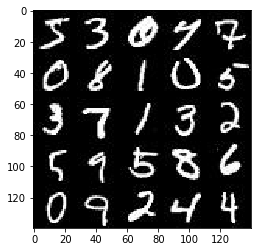

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

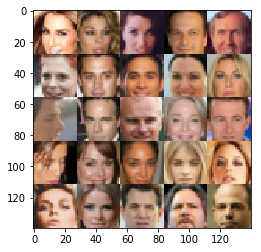

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/Users/sneg/tools/miniconda2/envs/deeplearning/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder (tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder (tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder (tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2

    with tf.variable_scope ('discriminator', reuse=reuse):
        # input is 28x28x3
        h1 = tf.layers.conv2d (images, 64, 5, strides=2, use_bias=False, padding='same')
        h1 = tf.layers.batch_normalization (h1, training=True)
        h1 = tf.maximum (alpha * h1, h1)
        # 14x14x64 now
        
        h2 = tf.layers.conv2d (h1, 128, 5, strides=2, use_bias=False, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=True)
        h2 = tf.maximum (alpha * h2, h2)
        # 7x7x128 now
        
        h3 = tf.layers.conv2d (h2, 512, 5, strides=2, use_bias=False, padding='same')
        h3 = tf.layers.batch_normalization (h3, training=True)
        h3 = tf.maximum (alpha * h3, h3)
        # 4x4x512 now
        
        flat = tf.reshape (h3, (-1, 4*4*512))
        logits = tf.layers.dense (flat, 1, activation=None)
        out = tf.sigmoid (logits)

#        print ('H0: {}. '.format (h1.get_shape().as_list()),
#               'H2: {}. '.format (h2.get_shape().as_list()),
#               'H3: {}. '.format (h3.get_shape().as_list()),
#               'Logits: {}. '.format (logits.get_shape().as_list()))

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    
    with tf.variable_scope ('generator', reuse=is_train==False):
        h0 = tf.layers.dense (z, 4*4*1024, activation=None)
        h0 = tf.reshape (h0, [-1, 4, 4, 1024])
        h0 = tf.layers.batch_normalization (h0, training=is_train)
        h0 = tf.maximum (alpha * h0, h0)
        # 4x4x1024 now
                
        h1 = tf.layers.conv2d_transpose (h0, 512, 5, strides=3, use_bias=False, padding='valid')
        h1 = tf.layers.batch_normalization (h1, training=is_train)
        h1 = tf.maximum (alpha * h1, h1)
        # 14x14x512 now
        
        h2 = tf.layers.conv2d_transpose (h1, 256, 5, strides=2, use_bias=False, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=is_train)
        h2 = tf.maximum (alpha * h2, h2)
        # 28x28x256 now
        
        h3 = tf.layers.conv2d_transpose (h2, 128, 5, strides=2, use_bias=False, padding='same')
        h3 = tf.layers.batch_normalization (h3, training=is_train)
        h3 = tf.maximum (alpha * h3, h3)
        # 56x56x128 now
        
        logits = tf.layers.conv2d (h3, out_channel_dim, 5, strides=2, use_bias=True, padding='same')
        out = tf.tanh (logits)
        # 28x28x3 now
        
#        print ('H0: {}. '.format (h0.get_shape().as_list()),
#               'H1: {}. '.format (h1.get_shape().as_list()),
#               'H2: {}. '.format (h2.get_shape().as_list()),
#               'H3: {}. '.format (h3.get_shape().as_list()),
#               'Logits: {}. '.format (logits.get_shape().as_list()))
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator (input_z, out_channel_dim, is_train=True)
    
    smooth = 0.1
    
    disc_model_real, disc_logits_real = discriminator (input_real, reuse=False)
    disc_model_fake, disc_logits_fake = discriminator (gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_real, labels=tf.ones_like(disc_logits_real) * (1 - smooth)))

    disc_loss_fake = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.zeros_like(disc_logits_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    gen_loss = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.ones_like(disc_logits_fake)))

    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    trainable = tf.trainable_variables()
    disc_vars = [var for var in trainable if var.name.startswith ('discriminator')]
    gen_vars  = [var for var in trainable if var.name.startswith ('generator')]
    
    d_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='discriminator')
    g_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')

    with tf.control_dependencies(d_update_ops):    
        disc_opt = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (d_loss, var_list=disc_vars)
        
    with tf.control_dependencies(g_update_ops):    
        gen_opt  = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (g_loss, var_list=gen_vars)
    
    return disc_opt, gen_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

In [11]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,1), nrows=1, ncols=7, sharey=True, sharex=True)
#    fig, axes = plt.subplots(figsize=(7,7), nrows=1, ncols=6, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    
    return fig, axes

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [16]:
import matplotlib.pyplot as plt
import pickle as pkl

if not os.path.exists('./checkpoints'):
    os.makedirs('./checkpoints')

def train(epoch_count, batch_size, z_dim, lr, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
#    tf.reset_default_graph()
#    print ('Data shape: {}'.format (data_shape))
    out_channel_dim = data_shape[3]
    input_real, input_z, learning_rate = model_inputs (data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss (input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt (d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform (-1, 1, size=(16, z_dim))
    samples = []
    losses = []
    step = 0
       
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform (-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run (d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_z: batch_z, learning_rate: lr})

                if step % 10 == 0: 
                    train_loss_d = sess.run (d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = sess.run (g_loss, feed_dict={input_z: batch_z})
                    losses.append ((train_loss_d, train_loss_g))
            
                    print ("Epoch: {}/{}. ".format (epoch_i + 1, epoch_count),
                            "Step: {:4d}. ".format (step),
                            "Discriminator: {:.4f}. ".format (train_loss_d),
                            "Generator: {:.4f}.".format (train_loss_g))
            
                if step % 100 == 0:
#                    gen_samples = sess.run (
#                        generator (input_z, out_channel_dim, is_train=False),
#                        feed_dict = {input_z: sample_z})
#                    samples.append (gen_samples)
#                    _ = view_samples (len(samples) - 1, samples)
#                    plt.show()
                    show_generator_output(sess, 2, input_z, out_channel_dim, data_image_mode)

                if step % 1000 == 0:
                    show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
        
        show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
        saver.save (sess, './checkpoints/generator_celeb.ckpt')

    with open('train_losses.pkl', 'wb') as f:
        pkl.dump (losses, f)

    with open('train_samples.pkl', 'wb') as f:
        pkl.dump (samples, f)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1/2.  Step:   10.  Discriminator: 0.4084.  Generator: 3.7356.
Epoch: 1/2.  Step:   20.  Discriminator: 1.2109.  Generator: 1.1418.
Epoch: 1/2.  Step:   30.  Discriminator: 1.1467.  Generator: 2.2210.
Epoch: 1/2.  Step:   40.  Discriminator: 1.2486.  Generator: 1.2010.
Epoch: 1/2.  Step:   50.  Discriminator: 2.3709.  Generator: 5.8540.
Epoch: 1/2.  Step:   60.  Discriminator: 1.2944.  Generator: 1.0929.
Epoch: 1/2.  Step:   70.  Discriminator: 2.0973.  Generator: 0.3012.
Epoch: 1/2.  Step:   80.  Discriminator: 2.1311.  Generator: 2.8205.
Epoch: 1/2.  Step:   90.  Discriminator: 1.6378.  Generator: 0.7959.
Epoch: 1/2.  Step:  100.  Discriminator: 1.3766.  Generator: 1.0284.


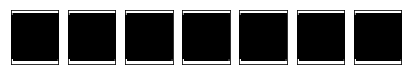

Epoch: 1/2.  Step:  110.  Discriminator: 1.5128.  Generator: 0.9172.
Epoch: 1/2.  Step:  120.  Discriminator: 1.2634.  Generator: 0.8666.
Epoch: 1/2.  Step:  130.  Discriminator: 2.6370.  Generator: 0.1511.
Epoch: 1/2.  Step:  140.  Discriminator: 1.1095.  Generator: 0.8984.
Epoch: 1/2.  Step:  150.  Discriminator: 1.9688.  Generator: 0.3960.
Epoch: 1/2.  Step:  160.  Discriminator: 1.8270.  Generator: 0.5357.
Epoch: 1/2.  Step:  170.  Discriminator: 1.9411.  Generator: 0.3986.
Epoch: 1/2.  Step:  180.  Discriminator: 1.6575.  Generator: 0.5224.
Epoch: 1/2.  Step:  190.  Discriminator: 1.5901.  Generator: 0.5371.
Epoch: 1/2.  Step:  200.  Discriminator: 1.9051.  Generator: 0.3175.


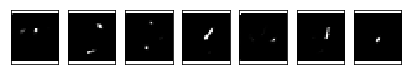

Epoch: 1/2.  Step:  210.  Discriminator: 2.2685.  Generator: 0.2289.
Epoch: 1/2.  Step:  220.  Discriminator: 1.4470.  Generator: 0.5537.
Epoch: 1/2.  Step:  230.  Discriminator: 1.4137.  Generator: 0.6042.
Epoch: 1/2.  Step:  240.  Discriminator: 1.6886.  Generator: 0.4759.
Epoch: 1/2.  Step:  250.  Discriminator: 1.6421.  Generator: 0.4719.
Epoch: 1/2.  Step:  260.  Discriminator: 1.6121.  Generator: 0.4535.
Epoch: 1/2.  Step:  270.  Discriminator: 1.6802.  Generator: 0.5206.
Epoch: 1/2.  Step:  280.  Discriminator: 1.6932.  Generator: 0.4818.
Epoch: 1/2.  Step:  290.  Discriminator: 1.9377.  Generator: 0.2705.
Epoch: 1/2.  Step:  300.  Discriminator: 1.5442.  Generator: 0.5697.


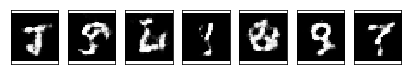

Epoch: 1/2.  Step:  310.  Discriminator: 1.6347.  Generator: 0.4304.
Epoch: 1/2.  Step:  320.  Discriminator: 1.5371.  Generator: 0.4916.
Epoch: 1/2.  Step:  330.  Discriminator: 1.6403.  Generator: 0.6486.
Epoch: 1/2.  Step:  340.  Discriminator: 1.6379.  Generator: 0.4382.
Epoch: 1/2.  Step:  350.  Discriminator: 1.4368.  Generator: 0.7216.
Epoch: 1/2.  Step:  360.  Discriminator: 1.6851.  Generator: 0.4164.
Epoch: 1/2.  Step:  370.  Discriminator: 1.5483.  Generator: 0.5629.
Epoch: 1/2.  Step:  380.  Discriminator: 1.8161.  Generator: 0.3305.
Epoch: 1/2.  Step:  390.  Discriminator: 1.4382.  Generator: 0.7429.
Epoch: 1/2.  Step:  400.  Discriminator: 1.6789.  Generator: 0.4260.


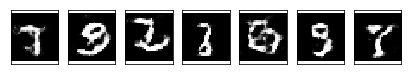

Epoch: 1/2.  Step:  410.  Discriminator: 1.8843.  Generator: 0.3500.
Epoch: 1/2.  Step:  420.  Discriminator: 1.4126.  Generator: 0.6153.
Epoch: 1/2.  Step:  430.  Discriminator: 1.6406.  Generator: 0.5350.
Epoch: 1/2.  Step:  440.  Discriminator: 1.9494.  Generator: 0.3154.
Epoch: 1/2.  Step:  450.  Discriminator: 1.4891.  Generator: 0.7921.
Epoch: 1/2.  Step:  460.  Discriminator: 1.5298.  Generator: 0.6351.
Epoch: 1/2.  Step:  470.  Discriminator: 1.6282.  Generator: 0.4971.
Epoch: 1/2.  Step:  480.  Discriminator: 1.6971.  Generator: 0.5341.
Epoch: 1/2.  Step:  490.  Discriminator: 1.5631.  Generator: 0.7461.
Epoch: 1/2.  Step:  500.  Discriminator: 1.6617.  Generator: 0.4154.


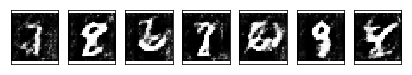

Epoch: 1/2.  Step:  510.  Discriminator: 1.5518.  Generator: 0.7775.
Epoch: 1/2.  Step:  520.  Discriminator: 1.4687.  Generator: 0.7030.
Epoch: 1/2.  Step:  530.  Discriminator: 1.4237.  Generator: 0.5685.
Epoch: 1/2.  Step:  540.  Discriminator: 1.5520.  Generator: 0.6293.
Epoch: 1/2.  Step:  550.  Discriminator: 1.7687.  Generator: 0.6303.
Epoch: 1/2.  Step:  560.  Discriminator: 1.4879.  Generator: 0.7685.
Epoch: 1/2.  Step:  570.  Discriminator: 1.4679.  Generator: 0.7472.
Epoch: 1/2.  Step:  580.  Discriminator: 1.4402.  Generator: 0.7957.
Epoch: 1/2.  Step:  590.  Discriminator: 1.4421.  Generator: 0.5756.
Epoch: 1/2.  Step:  600.  Discriminator: 1.6462.  Generator: 0.4603.


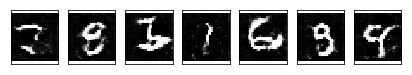

Epoch: 1/2.  Step:  610.  Discriminator: 1.7636.  Generator: 0.3693.
Epoch: 1/2.  Step:  620.  Discriminator: 1.3949.  Generator: 0.5832.
Epoch: 1/2.  Step:  630.  Discriminator: 1.4865.  Generator: 0.5707.
Epoch: 1/2.  Step:  640.  Discriminator: 1.4435.  Generator: 0.9271.
Epoch: 1/2.  Step:  650.  Discriminator: 1.5367.  Generator: 0.6472.
Epoch: 1/2.  Step:  660.  Discriminator: 1.6114.  Generator: 0.5267.
Epoch: 1/2.  Step:  670.  Discriminator: 1.5667.  Generator: 0.8925.
Epoch: 1/2.  Step:  680.  Discriminator: 1.5267.  Generator: 0.6545.
Epoch: 1/2.  Step:  690.  Discriminator: 1.6938.  Generator: 0.4177.
Epoch: 1/2.  Step:  700.  Discriminator: 1.5463.  Generator: 0.5175.


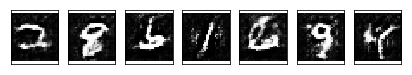

Epoch: 1/2.  Step:  710.  Discriminator: 1.9520.  Generator: 0.2759.
Epoch: 1/2.  Step:  720.  Discriminator: 1.5791.  Generator: 0.5489.
Epoch: 1/2.  Step:  730.  Discriminator: 1.6915.  Generator: 0.4069.
Epoch: 1/2.  Step:  740.  Discriminator: 1.6179.  Generator: 0.5628.
Epoch: 1/2.  Step:  750.  Discriminator: 1.5590.  Generator: 0.9585.
Epoch: 1/2.  Step:  760.  Discriminator: 1.2644.  Generator: 1.0653.
Epoch: 1/2.  Step:  770.  Discriminator: 1.4257.  Generator: 0.8439.
Epoch: 1/2.  Step:  780.  Discriminator: 1.5742.  Generator: 0.6842.
Epoch: 1/2.  Step:  790.  Discriminator: 1.5552.  Generator: 0.6054.
Epoch: 1/2.  Step:  800.  Discriminator: 1.5872.  Generator: 0.4417.


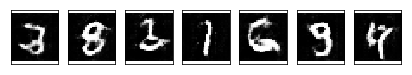

Epoch: 1/2.  Step:  810.  Discriminator: 1.4581.  Generator: 0.8406.
Epoch: 1/2.  Step:  820.  Discriminator: 1.4994.  Generator: 0.5040.
Epoch: 1/2.  Step:  830.  Discriminator: 1.4397.  Generator: 0.6048.
Epoch: 1/2.  Step:  840.  Discriminator: 1.4544.  Generator: 0.9151.
Epoch: 1/2.  Step:  850.  Discriminator: 1.6004.  Generator: 0.4020.
Epoch: 1/2.  Step:  860.  Discriminator: 1.6158.  Generator: 0.5320.
Epoch: 1/2.  Step:  870.  Discriminator: 1.6426.  Generator: 0.4454.
Epoch: 1/2.  Step:  880.  Discriminator: 1.5746.  Generator: 0.6085.
Epoch: 1/2.  Step:  890.  Discriminator: 1.6367.  Generator: 0.4830.
Epoch: 1/2.  Step:  900.  Discriminator: 1.5217.  Generator: 0.5291.


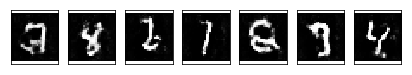

Epoch: 1/2.  Step:  910.  Discriminator: 1.4790.  Generator: 0.7971.
Epoch: 1/2.  Step:  920.  Discriminator: 1.5191.  Generator: 0.5417.
Epoch: 1/2.  Step:  930.  Discriminator: 1.6571.  Generator: 0.4747.
Epoch: 1/2.  Step:  940.  Discriminator: 1.5970.  Generator: 0.4440.
Epoch: 1/2.  Step:  950.  Discriminator: 1.4940.  Generator: 0.5691.
Epoch: 1/2.  Step:  960.  Discriminator: 1.4248.  Generator: 0.8160.
Epoch: 1/2.  Step:  970.  Discriminator: 1.6181.  Generator: 0.5856.
Epoch: 1/2.  Step:  980.  Discriminator: 1.4180.  Generator: 0.9102.
Epoch: 1/2.  Step:  990.  Discriminator: 1.4891.  Generator: 0.6067.
Epoch: 1/2.  Step: 1000.  Discriminator: 1.5310.  Generator: 0.4913.


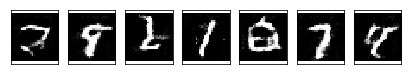

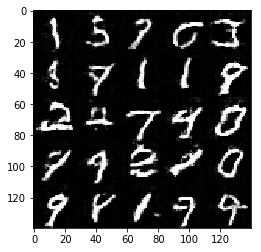

Epoch: 1/2.  Step: 1010.  Discriminator: 1.5183.  Generator: 0.4482.
Epoch: 1/2.  Step: 1020.  Discriminator: 1.5482.  Generator: 0.6238.
Epoch: 1/2.  Step: 1030.  Discriminator: 1.5507.  Generator: 0.7369.
Epoch: 1/2.  Step: 1040.  Discriminator: 1.6403.  Generator: 0.4563.
Epoch: 1/2.  Step: 1050.  Discriminator: 1.5527.  Generator: 0.5058.
Epoch: 1/2.  Step: 1060.  Discriminator: 1.5060.  Generator: 0.6158.
Epoch: 1/2.  Step: 1070.  Discriminator: 1.5186.  Generator: 0.5492.
Epoch: 1/2.  Step: 1080.  Discriminator: 1.5135.  Generator: 0.6017.
Epoch: 1/2.  Step: 1090.  Discriminator: 1.3524.  Generator: 0.5915.
Epoch: 1/2.  Step: 1100.  Discriminator: 1.7040.  Generator: 0.4696.


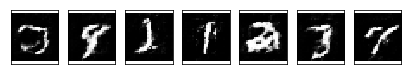

Epoch: 1/2.  Step: 1110.  Discriminator: 1.6303.  Generator: 0.5030.
Epoch: 1/2.  Step: 1120.  Discriminator: 1.4109.  Generator: 0.8054.
Epoch: 1/2.  Step: 1130.  Discriminator: 1.4054.  Generator: 1.0380.
Epoch: 1/2.  Step: 1140.  Discriminator: 1.5096.  Generator: 0.5992.
Epoch: 1/2.  Step: 1150.  Discriminator: 1.4551.  Generator: 0.8867.
Epoch: 1/2.  Step: 1160.  Discriminator: 1.4196.  Generator: 0.8729.
Epoch: 1/2.  Step: 1170.  Discriminator: 1.4643.  Generator: 0.8034.
Epoch: 1/2.  Step: 1180.  Discriminator: 1.3703.  Generator: 0.9060.
Epoch: 1/2.  Step: 1190.  Discriminator: 1.4065.  Generator: 0.6189.
Epoch: 1/2.  Step: 1200.  Discriminator: 1.2445.  Generator: 1.2202.


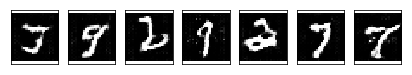

Epoch: 1/2.  Step: 1210.  Discriminator: 1.3395.  Generator: 0.6692.
Epoch: 1/2.  Step: 1220.  Discriminator: 1.4258.  Generator: 0.6610.
Epoch: 1/2.  Step: 1230.  Discriminator: 1.5855.  Generator: 0.5899.
Epoch: 1/2.  Step: 1240.  Discriminator: 1.5304.  Generator: 0.5271.
Epoch: 1/2.  Step: 1250.  Discriminator: 1.4880.  Generator: 0.5288.
Epoch: 1/2.  Step: 1260.  Discriminator: 1.3712.  Generator: 0.8574.
Epoch: 1/2.  Step: 1270.  Discriminator: 1.2812.  Generator: 0.7115.
Epoch: 1/2.  Step: 1280.  Discriminator: 1.3885.  Generator: 0.6821.
Epoch: 1/2.  Step: 1290.  Discriminator: 1.6390.  Generator: 0.3976.
Epoch: 1/2.  Step: 1300.  Discriminator: 1.4554.  Generator: 0.8168.


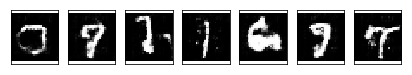

Epoch: 1/2.  Step: 1310.  Discriminator: 1.3622.  Generator: 0.9727.
Epoch: 1/2.  Step: 1320.  Discriminator: 1.5676.  Generator: 0.4641.
Epoch: 1/2.  Step: 1330.  Discriminator: 1.5769.  Generator: 0.5965.
Epoch: 1/2.  Step: 1340.  Discriminator: 1.5673.  Generator: 0.4678.
Epoch: 1/2.  Step: 1350.  Discriminator: 1.7246.  Generator: 0.3460.
Epoch: 1/2.  Step: 1360.  Discriminator: 1.5565.  Generator: 0.5923.
Epoch: 1/2.  Step: 1370.  Discriminator: 1.5568.  Generator: 0.4814.
Epoch: 1/2.  Step: 1380.  Discriminator: 1.5353.  Generator: 0.6114.
Epoch: 1/2.  Step: 1390.  Discriminator: 1.4935.  Generator: 0.5875.
Epoch: 1/2.  Step: 1400.  Discriminator: 1.5475.  Generator: 0.4788.


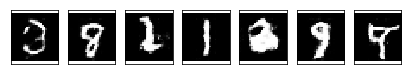

Epoch: 1/2.  Step: 1410.  Discriminator: 1.5358.  Generator: 0.6714.
Epoch: 1/2.  Step: 1420.  Discriminator: 1.3968.  Generator: 0.6616.
Epoch: 1/2.  Step: 1430.  Discriminator: 1.5590.  Generator: 0.7393.
Epoch: 1/2.  Step: 1440.  Discriminator: 1.4977.  Generator: 0.7979.
Epoch: 1/2.  Step: 1450.  Discriminator: 1.5498.  Generator: 0.4983.
Epoch: 1/2.  Step: 1460.  Discriminator: 1.4778.  Generator: 0.5078.
Epoch: 1/2.  Step: 1470.  Discriminator: 1.5617.  Generator: 0.5601.
Epoch: 1/2.  Step: 1480.  Discriminator: 1.4762.  Generator: 0.5945.
Epoch: 1/2.  Step: 1490.  Discriminator: 1.4011.  Generator: 0.6807.
Epoch: 1/2.  Step: 1500.  Discriminator: 1.5145.  Generator: 0.7015.


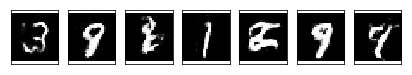

Epoch: 1/2.  Step: 1510.  Discriminator: 1.5366.  Generator: 0.4852.
Epoch: 1/2.  Step: 1520.  Discriminator: 1.4092.  Generator: 0.7558.
Epoch: 1/2.  Step: 1530.  Discriminator: 1.4969.  Generator: 0.7481.
Epoch: 1/2.  Step: 1540.  Discriminator: 1.3908.  Generator: 0.5826.
Epoch: 1/2.  Step: 1550.  Discriminator: 1.6465.  Generator: 0.4071.
Epoch: 1/2.  Step: 1560.  Discriminator: 1.5125.  Generator: 0.6415.
Epoch: 1/2.  Step: 1570.  Discriminator: 1.4247.  Generator: 0.5570.
Epoch: 1/2.  Step: 1580.  Discriminator: 1.4965.  Generator: 0.5063.
Epoch: 1/2.  Step: 1590.  Discriminator: 1.4099.  Generator: 0.6352.
Epoch: 1/2.  Step: 1600.  Discriminator: 1.6270.  Generator: 0.4729.


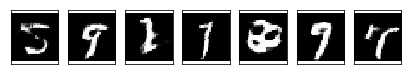

Epoch: 1/2.  Step: 1610.  Discriminator: 1.4367.  Generator: 0.8287.
Epoch: 1/2.  Step: 1620.  Discriminator: 1.5120.  Generator: 0.4843.
Epoch: 1/2.  Step: 1630.  Discriminator: 1.4705.  Generator: 0.5924.
Epoch: 1/2.  Step: 1640.  Discriminator: 1.3812.  Generator: 0.8326.
Epoch: 1/2.  Step: 1650.  Discriminator: 1.4455.  Generator: 0.5114.
Epoch: 1/2.  Step: 1660.  Discriminator: 1.5006.  Generator: 0.8946.
Epoch: 1/2.  Step: 1670.  Discriminator: 1.4914.  Generator: 0.5369.
Epoch: 1/2.  Step: 1680.  Discriminator: 1.3858.  Generator: 0.6837.
Epoch: 1/2.  Step: 1690.  Discriminator: 1.5262.  Generator: 0.7280.
Epoch: 1/2.  Step: 1700.  Discriminator: 1.5904.  Generator: 0.6022.


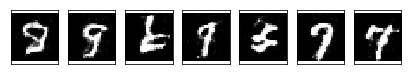

Epoch: 1/2.  Step: 1710.  Discriminator: 1.3690.  Generator: 0.6375.
Epoch: 1/2.  Step: 1720.  Discriminator: 1.3586.  Generator: 0.7477.
Epoch: 1/2.  Step: 1730.  Discriminator: 1.4920.  Generator: 0.5822.
Epoch: 1/2.  Step: 1740.  Discriminator: 1.6585.  Generator: 0.4755.
Epoch: 1/2.  Step: 1750.  Discriminator: 1.3892.  Generator: 0.6062.
Epoch: 1/2.  Step: 1760.  Discriminator: 1.6268.  Generator: 0.4429.
Epoch: 1/2.  Step: 1770.  Discriminator: 1.7804.  Generator: 0.4242.
Epoch: 1/2.  Step: 1780.  Discriminator: 1.3970.  Generator: 0.8224.
Epoch: 1/2.  Step: 1790.  Discriminator: 1.4778.  Generator: 0.5806.
Epoch: 1/2.  Step: 1800.  Discriminator: 1.3177.  Generator: 0.7170.


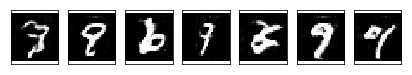

Epoch: 1/2.  Step: 1810.  Discriminator: 1.6067.  Generator: 0.5078.
Epoch: 1/2.  Step: 1820.  Discriminator: 1.3986.  Generator: 0.7371.
Epoch: 1/2.  Step: 1830.  Discriminator: 1.7730.  Generator: 0.4271.
Epoch: 1/2.  Step: 1840.  Discriminator: 1.4684.  Generator: 0.6393.
Epoch: 1/2.  Step: 1850.  Discriminator: 1.4055.  Generator: 0.6695.
Epoch: 1/2.  Step: 1860.  Discriminator: 1.5606.  Generator: 0.5712.
Epoch: 1/2.  Step: 1870.  Discriminator: 1.4113.  Generator: 0.7034.
Epoch: 2/2.  Step: 1880.  Discriminator: 1.3844.  Generator: 0.9552.
Epoch: 2/2.  Step: 1890.  Discriminator: 1.2815.  Generator: 0.8189.
Epoch: 2/2.  Step: 1900.  Discriminator: 1.3824.  Generator: 0.8013.


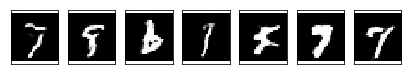

Epoch: 2/2.  Step: 1910.  Discriminator: 1.3632.  Generator: 0.7776.
Epoch: 2/2.  Step: 1920.  Discriminator: 1.4411.  Generator: 0.6481.
Epoch: 2/2.  Step: 1930.  Discriminator: 1.6854.  Generator: 0.3873.
Epoch: 2/2.  Step: 1940.  Discriminator: 1.4519.  Generator: 0.6602.
Epoch: 2/2.  Step: 1950.  Discriminator: 1.3710.  Generator: 0.8152.
Epoch: 2/2.  Step: 1960.  Discriminator: 1.5475.  Generator: 0.7197.
Epoch: 2/2.  Step: 1970.  Discriminator: 1.4925.  Generator: 0.5765.
Epoch: 2/2.  Step: 1980.  Discriminator: 1.6043.  Generator: 0.6412.
Epoch: 2/2.  Step: 1990.  Discriminator: 1.3847.  Generator: 0.6909.
Epoch: 2/2.  Step: 2000.  Discriminator: 1.3863.  Generator: 0.8566.


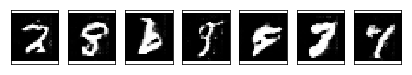

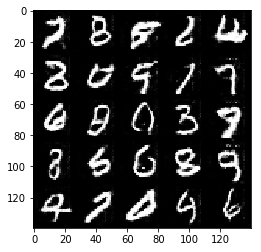

Epoch: 2/2.  Step: 2010.  Discriminator: 1.4798.  Generator: 0.5034.
Epoch: 2/2.  Step: 2020.  Discriminator: 1.3962.  Generator: 0.5802.
Epoch: 2/2.  Step: 2030.  Discriminator: 1.4276.  Generator: 0.6217.
Epoch: 2/2.  Step: 2040.  Discriminator: 1.4126.  Generator: 0.7322.
Epoch: 2/2.  Step: 2050.  Discriminator: 1.4182.  Generator: 0.6451.
Epoch: 2/2.  Step: 2060.  Discriminator: 1.5817.  Generator: 0.3920.
Epoch: 2/2.  Step: 2070.  Discriminator: 1.3956.  Generator: 0.7647.
Epoch: 2/2.  Step: 2080.  Discriminator: 1.5355.  Generator: 0.7313.
Epoch: 2/2.  Step: 2090.  Discriminator: 1.4964.  Generator: 0.5344.
Epoch: 2/2.  Step: 2100.  Discriminator: 1.3816.  Generator: 0.7355.


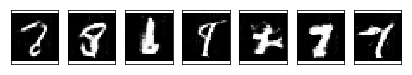

Epoch: 2/2.  Step: 2110.  Discriminator: 1.5450.  Generator: 0.4779.
Epoch: 2/2.  Step: 2120.  Discriminator: 1.4572.  Generator: 0.6353.
Epoch: 2/2.  Step: 2130.  Discriminator: 1.3399.  Generator: 0.5745.
Epoch: 2/2.  Step: 2140.  Discriminator: 1.4818.  Generator: 0.6043.
Epoch: 2/2.  Step: 2150.  Discriminator: 1.5327.  Generator: 0.4611.
Epoch: 2/2.  Step: 2160.  Discriminator: 1.3987.  Generator: 0.6455.
Epoch: 2/2.  Step: 2170.  Discriminator: 1.5959.  Generator: 0.6472.
Epoch: 2/2.  Step: 2180.  Discriminator: 1.4747.  Generator: 0.5825.
Epoch: 2/2.  Step: 2190.  Discriminator: 1.3746.  Generator: 0.6924.
Epoch: 2/2.  Step: 2200.  Discriminator: 1.5485.  Generator: 0.6747.


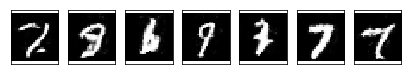

Epoch: 2/2.  Step: 2210.  Discriminator: 1.4229.  Generator: 0.7154.
Epoch: 2/2.  Step: 2220.  Discriminator: 1.3917.  Generator: 0.6804.
Epoch: 2/2.  Step: 2230.  Discriminator: 1.4111.  Generator: 0.7366.
Epoch: 2/2.  Step: 2240.  Discriminator: 1.4378.  Generator: 0.8293.
Epoch: 2/2.  Step: 2250.  Discriminator: 1.3546.  Generator: 0.7586.
Epoch: 2/2.  Step: 2260.  Discriminator: 1.2564.  Generator: 1.1008.
Epoch: 2/2.  Step: 2270.  Discriminator: 1.3753.  Generator: 0.9333.
Epoch: 2/2.  Step: 2280.  Discriminator: 1.2722.  Generator: 0.8074.
Epoch: 2/2.  Step: 2290.  Discriminator: 1.5641.  Generator: 0.5828.
Epoch: 2/2.  Step: 2300.  Discriminator: 1.4640.  Generator: 0.5401.


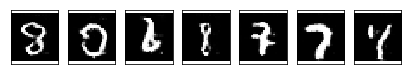

Epoch: 2/2.  Step: 2310.  Discriminator: 1.3745.  Generator: 0.8411.
Epoch: 2/2.  Step: 2320.  Discriminator: 1.4483.  Generator: 0.6128.
Epoch: 2/2.  Step: 2330.  Discriminator: 1.4487.  Generator: 0.6160.
Epoch: 2/2.  Step: 2340.  Discriminator: 1.3996.  Generator: 0.6626.
Epoch: 2/2.  Step: 2350.  Discriminator: 1.3609.  Generator: 0.7989.
Epoch: 2/2.  Step: 2360.  Discriminator: 1.4147.  Generator: 0.7812.
Epoch: 2/2.  Step: 2370.  Discriminator: 1.3530.  Generator: 0.6930.
Epoch: 2/2.  Step: 2380.  Discriminator: 1.3928.  Generator: 0.9140.
Epoch: 2/2.  Step: 2390.  Discriminator: 1.4119.  Generator: 0.6983.
Epoch: 2/2.  Step: 2400.  Discriminator: 1.4091.  Generator: 0.6790.


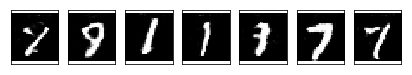

Epoch: 2/2.  Step: 2410.  Discriminator: 1.1875.  Generator: 0.9747.
Epoch: 2/2.  Step: 2420.  Discriminator: 1.4094.  Generator: 0.6062.
Epoch: 2/2.  Step: 2430.  Discriminator: 1.4481.  Generator: 0.7278.
Epoch: 2/2.  Step: 2440.  Discriminator: 1.2211.  Generator: 0.8879.
Epoch: 2/2.  Step: 2450.  Discriminator: 1.1659.  Generator: 0.9683.
Epoch: 2/2.  Step: 2460.  Discriminator: 1.2641.  Generator: 0.8134.
Epoch: 2/2.  Step: 2470.  Discriminator: 1.5751.  Generator: 0.5970.
Epoch: 2/2.  Step: 2480.  Discriminator: 1.3659.  Generator: 0.6852.
Epoch: 2/2.  Step: 2490.  Discriminator: 1.2771.  Generator: 0.7669.
Epoch: 2/2.  Step: 2500.  Discriminator: 1.5542.  Generator: 0.5241.


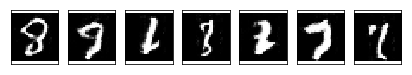

Epoch: 2/2.  Step: 2510.  Discriminator: 1.6249.  Generator: 1.0857.
Epoch: 2/2.  Step: 2520.  Discriminator: 1.4117.  Generator: 0.8181.
Epoch: 2/2.  Step: 2530.  Discriminator: 1.5604.  Generator: 0.5641.
Epoch: 2/2.  Step: 2540.  Discriminator: 1.4860.  Generator: 0.5693.
Epoch: 2/2.  Step: 2550.  Discriminator: 1.3611.  Generator: 0.6352.
Epoch: 2/2.  Step: 2560.  Discriminator: 1.4181.  Generator: 0.6108.
Epoch: 2/2.  Step: 2570.  Discriminator: 1.5307.  Generator: 0.4856.
Epoch: 2/2.  Step: 2580.  Discriminator: 1.3135.  Generator: 0.7994.
Epoch: 2/2.  Step: 2590.  Discriminator: 1.5148.  Generator: 0.7550.
Epoch: 2/2.  Step: 2600.  Discriminator: 1.3316.  Generator: 0.8171.


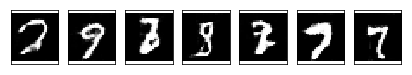

Epoch: 2/2.  Step: 2610.  Discriminator: 1.4675.  Generator: 0.6359.
Epoch: 2/2.  Step: 2620.  Discriminator: 1.4351.  Generator: 0.6180.
Epoch: 2/2.  Step: 2630.  Discriminator: 1.4483.  Generator: 0.6362.
Epoch: 2/2.  Step: 2640.  Discriminator: 1.6583.  Generator: 0.5360.
Epoch: 2/2.  Step: 2650.  Discriminator: 1.2576.  Generator: 0.8962.
Epoch: 2/2.  Step: 2660.  Discriminator: 1.4109.  Generator: 0.7858.
Epoch: 2/2.  Step: 2670.  Discriminator: 1.3731.  Generator: 0.6869.
Epoch: 2/2.  Step: 2680.  Discriminator: 1.3150.  Generator: 0.5878.
Epoch: 2/2.  Step: 2690.  Discriminator: 1.5427.  Generator: 0.4299.
Epoch: 2/2.  Step: 2700.  Discriminator: 1.4898.  Generator: 0.7132.


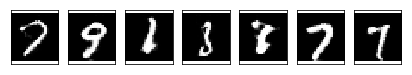

Epoch: 2/2.  Step: 2710.  Discriminator: 1.2578.  Generator: 1.0717.
Epoch: 2/2.  Step: 2720.  Discriminator: 1.5374.  Generator: 0.5430.
Epoch: 2/2.  Step: 2730.  Discriminator: 1.5770.  Generator: 0.5015.
Epoch: 2/2.  Step: 2740.  Discriminator: 1.4112.  Generator: 0.6104.
Epoch: 2/2.  Step: 2750.  Discriminator: 1.4149.  Generator: 0.5616.
Epoch: 2/2.  Step: 2760.  Discriminator: 1.5549.  Generator: 0.5161.
Epoch: 2/2.  Step: 2770.  Discriminator: 1.3387.  Generator: 0.6659.
Epoch: 2/2.  Step: 2780.  Discriminator: 1.4065.  Generator: 0.8696.
Epoch: 2/2.  Step: 2790.  Discriminator: 1.6239.  Generator: 0.5187.
Epoch: 2/2.  Step: 2800.  Discriminator: 1.5414.  Generator: 0.6097.


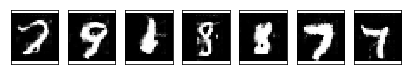

Epoch: 2/2.  Step: 2810.  Discriminator: 1.4207.  Generator: 0.6794.
Epoch: 2/2.  Step: 2820.  Discriminator: 1.3452.  Generator: 0.9525.
Epoch: 2/2.  Step: 2830.  Discriminator: 1.4164.  Generator: 0.6934.
Epoch: 2/2.  Step: 2840.  Discriminator: 1.4500.  Generator: 0.6543.
Epoch: 2/2.  Step: 2850.  Discriminator: 1.5566.  Generator: 0.4442.
Epoch: 2/2.  Step: 2860.  Discriminator: 1.4305.  Generator: 0.7176.
Epoch: 2/2.  Step: 2870.  Discriminator: 1.3404.  Generator: 0.8621.
Epoch: 2/2.  Step: 2880.  Discriminator: 1.4473.  Generator: 0.5516.
Epoch: 2/2.  Step: 2890.  Discriminator: 1.2805.  Generator: 0.6530.
Epoch: 2/2.  Step: 2900.  Discriminator: 1.4772.  Generator: 0.8122.


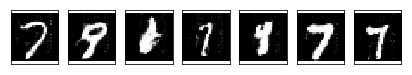

Epoch: 2/2.  Step: 2910.  Discriminator: 1.3573.  Generator: 0.7579.
Epoch: 2/2.  Step: 2920.  Discriminator: 1.5247.  Generator: 0.4655.
Epoch: 2/2.  Step: 2930.  Discriminator: 1.2759.  Generator: 0.6421.
Epoch: 2/2.  Step: 2940.  Discriminator: 1.5049.  Generator: 0.5929.
Epoch: 2/2.  Step: 2950.  Discriminator: 1.3222.  Generator: 0.9484.
Epoch: 2/2.  Step: 2960.  Discriminator: 1.3329.  Generator: 0.7639.
Epoch: 2/2.  Step: 2970.  Discriminator: 1.2797.  Generator: 0.7808.
Epoch: 2/2.  Step: 2980.  Discriminator: 1.3853.  Generator: 0.6089.
Epoch: 2/2.  Step: 2990.  Discriminator: 1.4076.  Generator: 0.5906.
Epoch: 2/2.  Step: 3000.  Discriminator: 1.2692.  Generator: 1.3612.


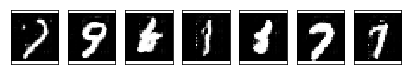

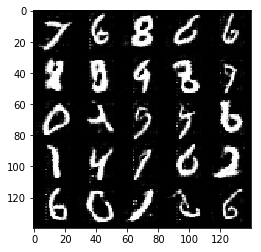

Epoch: 2/2.  Step: 3010.  Discriminator: 1.6518.  Generator: 0.4247.
Epoch: 2/2.  Step: 3020.  Discriminator: 1.4691.  Generator: 0.6565.
Epoch: 2/2.  Step: 3030.  Discriminator: 1.5939.  Generator: 0.9888.
Epoch: 2/2.  Step: 3040.  Discriminator: 1.3517.  Generator: 0.6732.
Epoch: 2/2.  Step: 3050.  Discriminator: 1.4460.  Generator: 0.4784.
Epoch: 2/2.  Step: 3060.  Discriminator: 1.3097.  Generator: 1.1318.
Epoch: 2/2.  Step: 3070.  Discriminator: 1.3660.  Generator: 0.8543.
Epoch: 2/2.  Step: 3080.  Discriminator: 1.4877.  Generator: 0.5259.
Epoch: 2/2.  Step: 3090.  Discriminator: 1.6468.  Generator: 0.5252.
Epoch: 2/2.  Step: 3100.  Discriminator: 1.4298.  Generator: 0.5160.


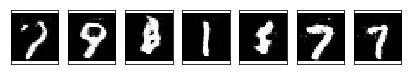

Epoch: 2/2.  Step: 3110.  Discriminator: 1.4761.  Generator: 0.5293.
Epoch: 2/2.  Step: 3120.  Discriminator: 1.4029.  Generator: 0.5860.
Epoch: 2/2.  Step: 3130.  Discriminator: 1.6365.  Generator: 0.4702.
Epoch: 2/2.  Step: 3140.  Discriminator: 1.4285.  Generator: 0.6381.
Epoch: 2/2.  Step: 3150.  Discriminator: 1.3471.  Generator: 0.6605.
Epoch: 2/2.  Step: 3160.  Discriminator: 1.4071.  Generator: 0.5556.
Epoch: 2/2.  Step: 3170.  Discriminator: 1.5094.  Generator: 0.7023.
Epoch: 2/2.  Step: 3180.  Discriminator: 1.3226.  Generator: 0.8850.
Epoch: 2/2.  Step: 3190.  Discriminator: 1.3503.  Generator: 0.7226.
Epoch: 2/2.  Step: 3200.  Discriminator: 1.5850.  Generator: 0.5687.


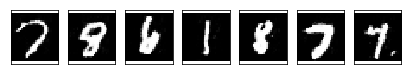

Epoch: 2/2.  Step: 3210.  Discriminator: 1.3426.  Generator: 0.6900.
Epoch: 2/2.  Step: 3220.  Discriminator: 1.3846.  Generator: 0.6442.
Epoch: 2/2.  Step: 3230.  Discriminator: 1.5387.  Generator: 0.6214.
Epoch: 2/2.  Step: 3240.  Discriminator: 1.5542.  Generator: 0.7664.
Epoch: 2/2.  Step: 3250.  Discriminator: 1.5435.  Generator: 0.4549.
Epoch: 2/2.  Step: 3260.  Discriminator: 1.2050.  Generator: 1.0120.
Epoch: 2/2.  Step: 3270.  Discriminator: 1.3774.  Generator: 0.6223.
Epoch: 2/2.  Step: 3280.  Discriminator: 1.4224.  Generator: 0.9358.
Epoch: 2/2.  Step: 3290.  Discriminator: 1.4977.  Generator: 0.4925.
Epoch: 2/2.  Step: 3300.  Discriminator: 1.4084.  Generator: 0.6035.


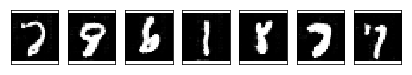

Epoch: 2/2.  Step: 3310.  Discriminator: 1.2782.  Generator: 0.9564.
Epoch: 2/2.  Step: 3320.  Discriminator: 1.3378.  Generator: 0.6954.
Epoch: 2/2.  Step: 3330.  Discriminator: 1.3306.  Generator: 0.9975.
Epoch: 2/2.  Step: 3340.  Discriminator: 1.3059.  Generator: 0.8354.
Epoch: 2/2.  Step: 3350.  Discriminator: 1.4583.  Generator: 0.9320.
Epoch: 2/2.  Step: 3360.  Discriminator: 1.2040.  Generator: 0.9533.
Epoch: 2/2.  Step: 3370.  Discriminator: 1.3934.  Generator: 0.5331.
Epoch: 2/2.  Step: 3380.  Discriminator: 1.4923.  Generator: 0.5546.
Epoch: 2/2.  Step: 3390.  Discriminator: 1.3165.  Generator: 0.7017.
Epoch: 2/2.  Step: 3400.  Discriminator: 1.4477.  Generator: 0.5581.


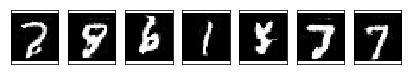

Epoch: 2/2.  Step: 3410.  Discriminator: 1.4734.  Generator: 0.6487.
Epoch: 2/2.  Step: 3420.  Discriminator: 1.3178.  Generator: 0.8375.
Epoch: 2/2.  Step: 3430.  Discriminator: 1.4808.  Generator: 0.7703.
Epoch: 2/2.  Step: 3440.  Discriminator: 1.3350.  Generator: 0.7965.
Epoch: 2/2.  Step: 3450.  Discriminator: 1.6978.  Generator: 0.6179.
Epoch: 2/2.  Step: 3460.  Discriminator: 1.4545.  Generator: 0.6554.
Epoch: 2/2.  Step: 3470.  Discriminator: 1.3451.  Generator: 0.6524.
Epoch: 2/2.  Step: 3480.  Discriminator: 1.3134.  Generator: 0.8428.
Epoch: 2/2.  Step: 3490.  Discriminator: 1.3376.  Generator: 1.1094.
Epoch: 2/2.  Step: 3500.  Discriminator: 1.4440.  Generator: 0.5647.


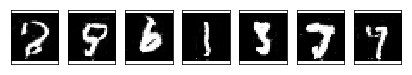

Epoch: 2/2.  Step: 3510.  Discriminator: 1.4284.  Generator: 0.5242.
Epoch: 2/2.  Step: 3520.  Discriminator: 1.2552.  Generator: 1.2007.
Epoch: 2/2.  Step: 3530.  Discriminator: 1.4973.  Generator: 0.9523.
Epoch: 2/2.  Step: 3540.  Discriminator: 1.0745.  Generator: 1.1591.
Epoch: 2/2.  Step: 3550.  Discriminator: 1.1465.  Generator: 0.8386.
Epoch: 2/2.  Step: 3560.  Discriminator: 1.3502.  Generator: 0.5854.
Epoch: 2/2.  Step: 3570.  Discriminator: 1.5230.  Generator: 0.5229.
Epoch: 2/2.  Step: 3580.  Discriminator: 1.0261.  Generator: 1.0679.
Epoch: 2/2.  Step: 3590.  Discriminator: 1.6407.  Generator: 0.4172.
Epoch: 2/2.  Step: 3600.  Discriminator: 1.6577.  Generator: 0.6690.


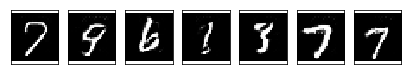

Epoch: 2/2.  Step: 3610.  Discriminator: 1.2199.  Generator: 1.1335.
Epoch: 2/2.  Step: 3620.  Discriminator: 1.4753.  Generator: 0.6649.
Epoch: 2/2.  Step: 3630.  Discriminator: 1.3558.  Generator: 0.7677.
Epoch: 2/2.  Step: 3640.  Discriminator: 1.6097.  Generator: 0.4977.
Epoch: 2/2.  Step: 3650.  Discriminator: 1.2606.  Generator: 0.6741.
Epoch: 2/2.  Step: 3660.  Discriminator: 1.5608.  Generator: 0.4491.
Epoch: 2/2.  Step: 3670.  Discriminator: 1.5004.  Generator: 0.7369.
Epoch: 2/2.  Step: 3680.  Discriminator: 1.5134.  Generator: 0.5598.
Epoch: 2/2.  Step: 3690.  Discriminator: 1.4143.  Generator: 0.5903.
Epoch: 2/2.  Step: 3700.  Discriminator: 1.4721.  Generator: 0.6027.


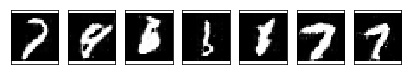

Epoch: 2/2.  Step: 3710.  Discriminator: 1.2571.  Generator: 0.7741.
Epoch: 2/2.  Step: 3720.  Discriminator: 1.3920.  Generator: 0.6472.
Epoch: 2/2.  Step: 3730.  Discriminator: 1.3785.  Generator: 0.7292.
Epoch: 2/2.  Step: 3740.  Discriminator: 1.4770.  Generator: 0.6683.
Epoch: 2/2.  Step: 3750.  Discriminator: 1.3751.  Generator: 0.5379.


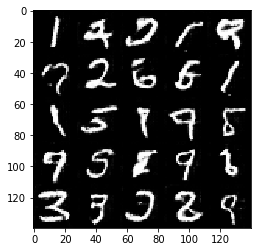

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

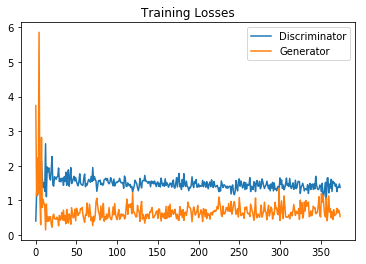

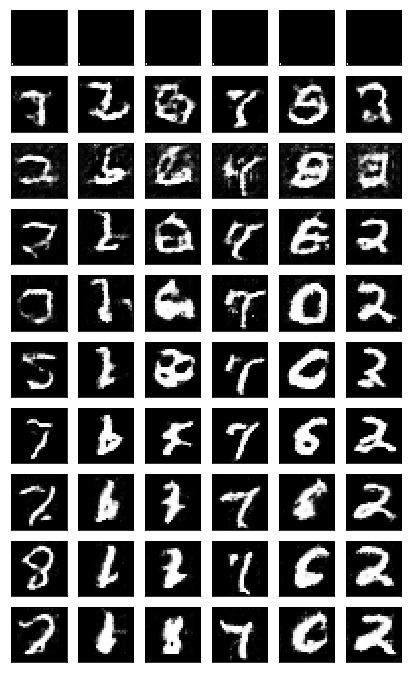

In [14]:
def plot_losses():
    with open ('train_losses.pkl', 'rb') as f:
        losses = pkl.load (f)

    fig, ax = plt.subplots()
    losses = np.array(losses)
    plt.plot(losses.T[0], label='Discriminator')
    plt.plot(losses.T[1], label='Generator')
    plt.title("Training Losses")
    plt.legend()
    
def show_samples():
    with open ('train_samples.pkl', 'rb') as f:
        samples = pkl.load (f)
    
    rows, cols = 10, 6
    fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

    for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
        for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
            ax.imshow(img.reshape((28,28)), cmap='Greys_r')
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

plot_losses()
show_samples()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1/1.  Step:   10.  Discriminator: 0.5101.  Generator: 3.1541.
Epoch: 1/1.  Step:   20.  Discriminator: 0.5287.  Generator: 15.7845.
Epoch: 1/1.  Step:   30.  Discriminator: 0.6572.  Generator: 5.7857.
Epoch: 1/1.  Step:   40.  Discriminator: 0.5163.  Generator: 2.2824.
Epoch: 1/1.  Step:   50.  Discriminator: 0.4285.  Generator: 3.9224.
Epoch: 1/1.  Step:   60.  Discriminator: 0.3811.  Generator: 3.8525.
Epoch: 1/1.  Step:   70.  Discriminator: 0.3697.  Generator: 4.7912.
Epoch: 1/1.  Step:   80.  Discriminator: 0.3788.  Generator: 4.1827.
Epoch: 1/1.  Step:   90.  Discriminator: 0.4875.  Generator: 2.5217.
Epoch: 1/1.  Step:  100.  Discriminator: 0.4862.  Generator: 10.5445.


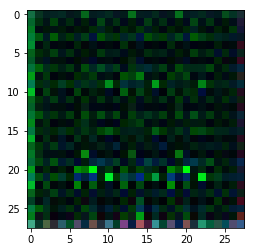

Epoch: 1/1.  Step:  110.  Discriminator: 0.3872.  Generator: 5.3478.
Epoch: 1/1.  Step:  120.  Discriminator: 2.3603.  Generator: 0.2714.
Epoch: 1/1.  Step:  130.  Discriminator: 1.5590.  Generator: 8.3638.
Epoch: 1/1.  Step:  140.  Discriminator: 1.9217.  Generator: 0.4631.
Epoch: 1/1.  Step:  150.  Discriminator: 0.5115.  Generator: 2.2388.
Epoch: 1/1.  Step:  160.  Discriminator: 0.4116.  Generator: 4.5250.
Epoch: 1/1.  Step:  170.  Discriminator: 0.3794.  Generator: 4.4194.
Epoch: 1/1.  Step:  180.  Discriminator: 0.3666.  Generator: 5.7692.
Epoch: 1/1.  Step:  190.  Discriminator: 0.3547.  Generator: 4.9741.
Epoch: 1/1.  Step:  200.  Discriminator: 0.3682.  Generator: 5.4854.


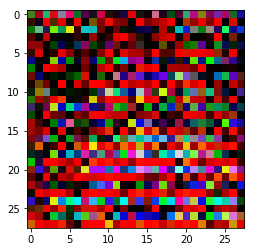

Epoch: 1/1.  Step:  210.  Discriminator: 0.3555.  Generator: 4.5838.
Epoch: 1/1.  Step:  220.  Discriminator: 0.3573.  Generator: 5.9414.
Epoch: 1/1.  Step:  230.  Discriminator: 0.3748.  Generator: 3.4135.
Epoch: 1/1.  Step:  240.  Discriminator: 0.3468.  Generator: 5.0776.
Epoch: 1/1.  Step:  250.  Discriminator: 0.3466.  Generator: 6.1963.
Epoch: 1/1.  Step:  260.  Discriminator: 0.3532.  Generator: 8.6708.
Epoch: 1/1.  Step:  270.  Discriminator: 0.3553.  Generator: 4.1901.
Epoch: 1/1.  Step:  280.  Discriminator: 0.3507.  Generator: 4.8175.
Epoch: 1/1.  Step:  290.  Discriminator: 1.8095.  Generator: 5.3546.
Epoch: 1/1.  Step:  300.  Discriminator: 2.0475.  Generator: 0.6350.


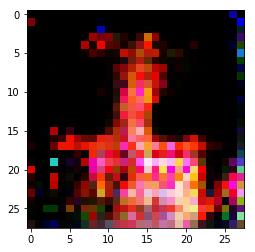

Epoch: 1/1.  Step:  310.  Discriminator: 1.8638.  Generator: 0.8191.
Epoch: 1/1.  Step:  320.  Discriminator: 2.3862.  Generator: 0.4194.
Epoch: 1/1.  Step:  330.  Discriminator: 1.8646.  Generator: 0.5538.
Epoch: 1/1.  Step:  340.  Discriminator: 2.0177.  Generator: 0.5077.
Epoch: 1/1.  Step:  350.  Discriminator: 1.4986.  Generator: 0.9069.
Epoch: 1/1.  Step:  360.  Discriminator: 1.6926.  Generator: 0.5215.
Epoch: 1/1.  Step:  370.  Discriminator: 1.5896.  Generator: 0.6211.
Epoch: 1/1.  Step:  380.  Discriminator: 1.5884.  Generator: 0.5954.
Epoch: 1/1.  Step:  390.  Discriminator: 1.9770.  Generator: 0.5332.
Epoch: 1/1.  Step:  400.  Discriminator: 1.6059.  Generator: 0.6105.


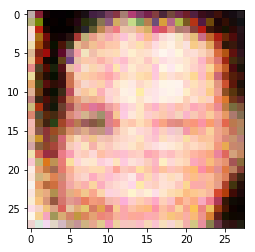

Epoch: 1/1.  Step:  410.  Discriminator: 1.7510.  Generator: 0.6126.
Epoch: 1/1.  Step:  420.  Discriminator: 1.6559.  Generator: 0.6171.
Epoch: 1/1.  Step:  430.  Discriminator: 1.7626.  Generator: 0.5164.
Epoch: 1/1.  Step:  440.  Discriminator: 1.4308.  Generator: 0.7629.
Epoch: 1/1.  Step:  450.  Discriminator: 1.5203.  Generator: 0.6807.
Epoch: 1/1.  Step:  460.  Discriminator: 1.6827.  Generator: 0.4658.
Epoch: 1/1.  Step:  470.  Discriminator: 1.4941.  Generator: 0.7640.
Epoch: 1/1.  Step:  480.  Discriminator: 1.7423.  Generator: 0.5690.
Epoch: 1/1.  Step:  490.  Discriminator: 1.7239.  Generator: 0.5744.
Epoch: 1/1.  Step:  500.  Discriminator: 1.5998.  Generator: 0.6817.


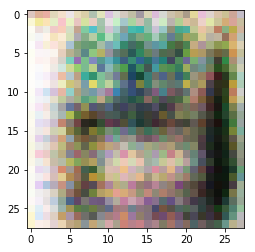

Epoch: 1/1.  Step:  510.  Discriminator: 1.6444.  Generator: 0.6046.
Epoch: 1/1.  Step:  520.  Discriminator: 1.7325.  Generator: 0.6053.
Epoch: 1/1.  Step:  530.  Discriminator: 1.6876.  Generator: 0.6665.
Epoch: 1/1.  Step:  540.  Discriminator: 1.4268.  Generator: 0.7566.
Epoch: 1/1.  Step:  550.  Discriminator: 1.4398.  Generator: 0.7952.
Epoch: 1/1.  Step:  560.  Discriminator: 1.5909.  Generator: 0.5922.
Epoch: 1/1.  Step:  570.  Discriminator: 1.6023.  Generator: 0.6154.
Epoch: 1/1.  Step:  580.  Discriminator: 1.6109.  Generator: 0.6564.
Epoch: 1/1.  Step:  590.  Discriminator: 1.5662.  Generator: 0.6626.
Epoch: 1/1.  Step:  600.  Discriminator: 1.4908.  Generator: 0.8321.


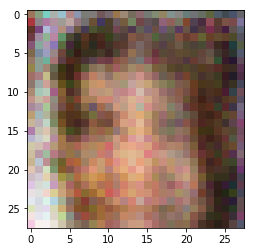

Epoch: 1/1.  Step:  610.  Discriminator: 1.4733.  Generator: 0.8590.
Epoch: 1/1.  Step:  620.  Discriminator: 1.4868.  Generator: 0.7447.
Epoch: 1/1.  Step:  630.  Discriminator: 1.4295.  Generator: 0.7666.
Epoch: 1/1.  Step:  640.  Discriminator: 1.5149.  Generator: 0.8688.
Epoch: 1/1.  Step:  650.  Discriminator: 1.7022.  Generator: 0.6229.
Epoch: 1/1.  Step:  660.  Discriminator: 1.4290.  Generator: 0.7677.
Epoch: 1/1.  Step:  670.  Discriminator: 1.5662.  Generator: 0.7287.
Epoch: 1/1.  Step:  680.  Discriminator: 1.6043.  Generator: 0.6223.
Epoch: 1/1.  Step:  690.  Discriminator: 1.4030.  Generator: 0.8295.
Epoch: 1/1.  Step:  700.  Discriminator: 1.5684.  Generator: 0.6636.


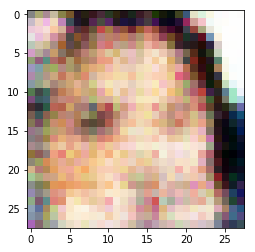

Epoch: 1/1.  Step:  710.  Discriminator: 1.4924.  Generator: 0.6319.
Epoch: 1/1.  Step:  720.  Discriminator: 1.5892.  Generator: 0.6727.
Epoch: 1/1.  Step:  730.  Discriminator: 1.4908.  Generator: 0.7799.
Epoch: 1/1.  Step:  740.  Discriminator: 1.4531.  Generator: 0.7328.
Epoch: 1/1.  Step:  750.  Discriminator: 1.4116.  Generator: 0.7873.
Epoch: 1/1.  Step:  760.  Discriminator: 1.6055.  Generator: 0.6598.
Epoch: 1/1.  Step:  770.  Discriminator: 1.5562.  Generator: 0.6734.
Epoch: 1/1.  Step:  780.  Discriminator: 1.4549.  Generator: 0.7806.
Epoch: 1/1.  Step:  790.  Discriminator: 1.4978.  Generator: 0.7517.
Epoch: 1/1.  Step:  800.  Discriminator: 1.4700.  Generator: 0.6973.


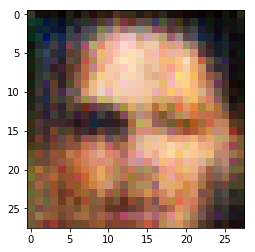

Epoch: 1/1.  Step:  810.  Discriminator: 1.4041.  Generator: 0.7857.
Epoch: 1/1.  Step:  820.  Discriminator: 1.5401.  Generator: 0.6521.
Epoch: 1/1.  Step:  830.  Discriminator: 1.5227.  Generator: 0.7455.
Epoch: 1/1.  Step:  840.  Discriminator: 1.4649.  Generator: 0.8055.
Epoch: 1/1.  Step:  850.  Discriminator: 1.5136.  Generator: 0.7342.
Epoch: 1/1.  Step:  860.  Discriminator: 1.4979.  Generator: 0.6732.
Epoch: 1/1.  Step:  870.  Discriminator: 1.4895.  Generator: 0.7191.
Epoch: 1/1.  Step:  880.  Discriminator: 1.5257.  Generator: 0.6483.
Epoch: 1/1.  Step:  890.  Discriminator: 1.4510.  Generator: 0.7073.
Epoch: 1/1.  Step:  900.  Discriminator: 1.4284.  Generator: 0.6816.


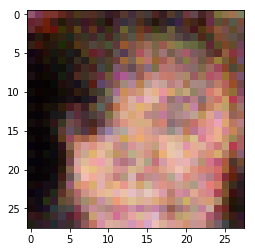

Epoch: 1/1.  Step:  910.  Discriminator: 1.4904.  Generator: 0.7445.
Epoch: 1/1.  Step:  920.  Discriminator: 1.4593.  Generator: 0.6892.
Epoch: 1/1.  Step:  930.  Discriminator: 1.5336.  Generator: 0.6444.
Epoch: 1/1.  Step:  940.  Discriminator: 1.5531.  Generator: 0.7078.
Epoch: 1/1.  Step:  950.  Discriminator: 1.4961.  Generator: 0.8103.
Epoch: 1/1.  Step:  960.  Discriminator: 1.4669.  Generator: 0.7553.
Epoch: 1/1.  Step:  970.  Discriminator: 1.5201.  Generator: 0.7125.
Epoch: 1/1.  Step:  980.  Discriminator: 1.5285.  Generator: 0.7139.
Epoch: 1/1.  Step:  990.  Discriminator: 1.4410.  Generator: 0.7499.
Epoch: 1/1.  Step: 1000.  Discriminator: 1.5096.  Generator: 0.6996.


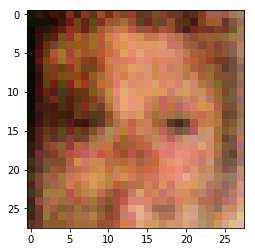

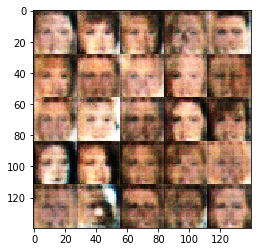

Epoch: 1/1.  Step: 1010.  Discriminator: 1.4111.  Generator: 0.7440.
Epoch: 1/1.  Step: 1020.  Discriminator: 1.4740.  Generator: 0.6931.
Epoch: 1/1.  Step: 1030.  Discriminator: 1.4998.  Generator: 0.6940.
Epoch: 1/1.  Step: 1040.  Discriminator: 1.4868.  Generator: 0.7965.
Epoch: 1/1.  Step: 1050.  Discriminator: 1.4364.  Generator: 0.7309.
Epoch: 1/1.  Step: 1060.  Discriminator: 1.4960.  Generator: 0.7820.
Epoch: 1/1.  Step: 1070.  Discriminator: 1.4703.  Generator: 0.7446.
Epoch: 1/1.  Step: 1080.  Discriminator: 1.3994.  Generator: 0.7876.
Epoch: 1/1.  Step: 1090.  Discriminator: 1.5804.  Generator: 0.8229.
Epoch: 1/1.  Step: 1100.  Discriminator: 1.6040.  Generator: 0.6864.


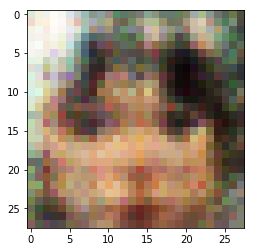

Epoch: 1/1.  Step: 1110.  Discriminator: 1.5789.  Generator: 0.6673.
Epoch: 1/1.  Step: 1120.  Discriminator: 1.5212.  Generator: 0.6951.
Epoch: 1/1.  Step: 1130.  Discriminator: 1.4812.  Generator: 0.7236.
Epoch: 1/1.  Step: 1140.  Discriminator: 1.5291.  Generator: 0.7280.
Epoch: 1/1.  Step: 1150.  Discriminator: 1.4921.  Generator: 0.7450.
Epoch: 1/1.  Step: 1160.  Discriminator: 1.4701.  Generator: 0.7859.
Epoch: 1/1.  Step: 1170.  Discriminator: 1.4694.  Generator: 0.7227.
Epoch: 1/1.  Step: 1180.  Discriminator: 1.4973.  Generator: 0.7005.
Epoch: 1/1.  Step: 1190.  Discriminator: 1.5535.  Generator: 0.6791.
Epoch: 1/1.  Step: 1200.  Discriminator: 1.5408.  Generator: 0.6996.


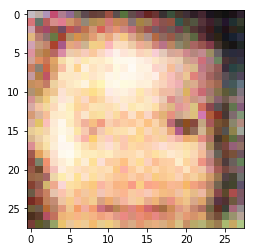

Epoch: 1/1.  Step: 1210.  Discriminator: 1.5965.  Generator: 0.6747.
Epoch: 1/1.  Step: 1220.  Discriminator: 1.5729.  Generator: 0.7194.
Epoch: 1/1.  Step: 1230.  Discriminator: 1.5023.  Generator: 0.7191.
Epoch: 1/1.  Step: 1240.  Discriminator: 1.5262.  Generator: 0.6137.
Epoch: 1/1.  Step: 1250.  Discriminator: 1.4772.  Generator: 0.7187.
Epoch: 1/1.  Step: 1260.  Discriminator: 1.4740.  Generator: 0.7062.
Epoch: 1/1.  Step: 1270.  Discriminator: 1.4362.  Generator: 0.7908.
Epoch: 1/1.  Step: 1280.  Discriminator: 1.4175.  Generator: 0.8005.
Epoch: 1/1.  Step: 1290.  Discriminator: 1.5653.  Generator: 0.7259.
Epoch: 1/1.  Step: 1300.  Discriminator: 1.4727.  Generator: 0.7916.


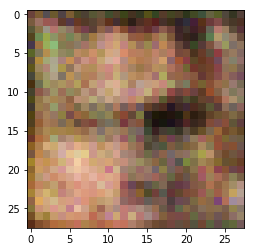

Epoch: 1/1.  Step: 1310.  Discriminator: 1.3768.  Generator: 0.8135.
Epoch: 1/1.  Step: 1320.  Discriminator: 1.3951.  Generator: 0.8055.
Epoch: 1/1.  Step: 1330.  Discriminator: 1.3886.  Generator: 0.8922.
Epoch: 1/1.  Step: 1340.  Discriminator: 1.5869.  Generator: 0.6244.
Epoch: 1/1.  Step: 1350.  Discriminator: 1.4545.  Generator: 0.7528.
Epoch: 1/1.  Step: 1360.  Discriminator: 1.4216.  Generator: 0.7947.
Epoch: 1/1.  Step: 1370.  Discriminator: 1.4782.  Generator: 0.6682.
Epoch: 1/1.  Step: 1380.  Discriminator: 1.5074.  Generator: 0.6763.
Epoch: 1/1.  Step: 1390.  Discriminator: 1.5865.  Generator: 0.6320.
Epoch: 1/1.  Step: 1400.  Discriminator: 1.6120.  Generator: 0.6705.


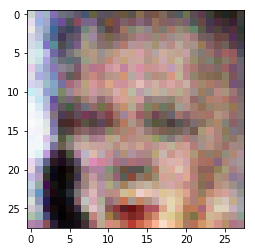

Epoch: 1/1.  Step: 1410.  Discriminator: 1.4438.  Generator: 0.7381.
Epoch: 1/1.  Step: 1420.  Discriminator: 1.5349.  Generator: 0.7946.
Epoch: 1/1.  Step: 1430.  Discriminator: 1.5068.  Generator: 0.7013.
Epoch: 1/1.  Step: 1440.  Discriminator: 1.4824.  Generator: 0.7388.
Epoch: 1/1.  Step: 1450.  Discriminator: 1.3841.  Generator: 0.8072.
Epoch: 1/1.  Step: 1460.  Discriminator: 1.4234.  Generator: 0.7929.
Epoch: 1/1.  Step: 1470.  Discriminator: 1.4218.  Generator: 0.8175.
Epoch: 1/1.  Step: 1480.  Discriminator: 1.3830.  Generator: 0.8942.
Epoch: 1/1.  Step: 1490.  Discriminator: 1.4406.  Generator: 0.6830.
Epoch: 1/1.  Step: 1500.  Discriminator: 1.3888.  Generator: 0.7010.


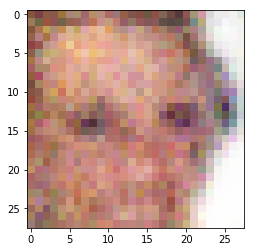

Epoch: 1/1.  Step: 1510.  Discriminator: 1.4435.  Generator: 0.7178.
Epoch: 1/1.  Step: 1520.  Discriminator: 1.4685.  Generator: 0.7086.
Epoch: 1/1.  Step: 1530.  Discriminator: 1.4083.  Generator: 0.7990.
Epoch: 1/1.  Step: 1540.  Discriminator: 1.6064.  Generator: 0.7350.
Epoch: 1/1.  Step: 1550.  Discriminator: 1.3945.  Generator: 0.7497.
Epoch: 1/1.  Step: 1560.  Discriminator: 1.4622.  Generator: 0.7622.
Epoch: 1/1.  Step: 1570.  Discriminator: 1.4995.  Generator: 0.7526.
Epoch: 1/1.  Step: 1580.  Discriminator: 1.4495.  Generator: 0.7553.
Epoch: 1/1.  Step: 1590.  Discriminator: 1.4335.  Generator: 0.7768.
Epoch: 1/1.  Step: 1600.  Discriminator: 1.4526.  Generator: 0.6848.


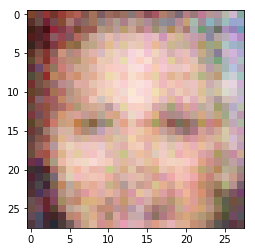

Epoch: 1/1.  Step: 1610.  Discriminator: 1.5159.  Generator: 0.7036.
Epoch: 1/1.  Step: 1620.  Discriminator: 1.4533.  Generator: 0.6644.
Epoch: 1/1.  Step: 1630.  Discriminator: 1.4355.  Generator: 0.8099.
Epoch: 1/1.  Step: 1640.  Discriminator: 1.4110.  Generator: 0.8062.
Epoch: 1/1.  Step: 1650.  Discriminator: 1.4329.  Generator: 0.7333.
Epoch: 1/1.  Step: 1660.  Discriminator: 1.3825.  Generator: 0.7488.
Epoch: 1/1.  Step: 1670.  Discriminator: 1.4045.  Generator: 0.7344.
Epoch: 1/1.  Step: 1680.  Discriminator: 1.4178.  Generator: 0.8715.
Epoch: 1/1.  Step: 1690.  Discriminator: 1.3992.  Generator: 0.7965.
Epoch: 1/1.  Step: 1700.  Discriminator: 1.4434.  Generator: 0.7825.


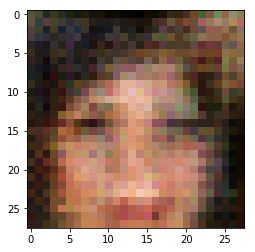

Epoch: 1/1.  Step: 1710.  Discriminator: 1.4544.  Generator: 0.7684.
Epoch: 1/1.  Step: 1720.  Discriminator: 1.4581.  Generator: 0.7006.
Epoch: 1/1.  Step: 1730.  Discriminator: 1.4336.  Generator: 0.7506.
Epoch: 1/1.  Step: 1740.  Discriminator: 1.4617.  Generator: 0.7566.
Epoch: 1/1.  Step: 1750.  Discriminator: 1.4524.  Generator: 0.7399.
Epoch: 1/1.  Step: 1760.  Discriminator: 1.4551.  Generator: 0.7431.
Epoch: 1/1.  Step: 1770.  Discriminator: 1.3797.  Generator: 0.7516.
Epoch: 1/1.  Step: 1780.  Discriminator: 1.4596.  Generator: 0.7749.
Epoch: 1/1.  Step: 1790.  Discriminator: 1.4070.  Generator: 0.7259.
Epoch: 1/1.  Step: 1800.  Discriminator: 1.3809.  Generator: 0.7942.


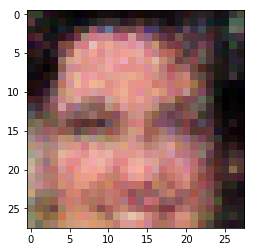

Epoch: 1/1.  Step: 1810.  Discriminator: 1.4995.  Generator: 0.6316.
Epoch: 1/1.  Step: 1820.  Discriminator: 1.5114.  Generator: 0.6947.
Epoch: 1/1.  Step: 1830.  Discriminator: 1.3903.  Generator: 0.7625.
Epoch: 1/1.  Step: 1840.  Discriminator: 1.4407.  Generator: 0.8262.
Epoch: 1/1.  Step: 1850.  Discriminator: 1.4445.  Generator: 0.7500.
Epoch: 1/1.  Step: 1860.  Discriminator: 1.4665.  Generator: 0.7574.
Epoch: 1/1.  Step: 1870.  Discriminator: 1.4533.  Generator: 0.7254.
Epoch: 1/1.  Step: 1880.  Discriminator: 1.4495.  Generator: 0.8006.
Epoch: 1/1.  Step: 1890.  Discriminator: 1.4854.  Generator: 0.6710.
Epoch: 1/1.  Step: 1900.  Discriminator: 1.4551.  Generator: 0.8125.


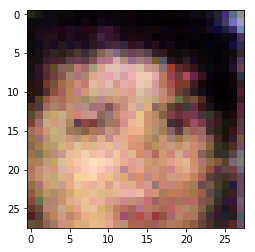

Epoch: 1/1.  Step: 1910.  Discriminator: 1.4431.  Generator: 0.8273.
Epoch: 1/1.  Step: 1920.  Discriminator: 1.4307.  Generator: 0.7508.
Epoch: 1/1.  Step: 1930.  Discriminator: 1.4085.  Generator: 0.8233.
Epoch: 1/1.  Step: 1940.  Discriminator: 1.4325.  Generator: 0.7138.
Epoch: 1/1.  Step: 1950.  Discriminator: 1.4108.  Generator: 0.6819.
Epoch: 1/1.  Step: 1960.  Discriminator: 1.5099.  Generator: 0.6984.
Epoch: 1/1.  Step: 1970.  Discriminator: 1.4539.  Generator: 0.7479.
Epoch: 1/1.  Step: 1980.  Discriminator: 1.4152.  Generator: 0.7377.
Epoch: 1/1.  Step: 1990.  Discriminator: 1.4549.  Generator: 0.7626.
Epoch: 1/1.  Step: 2000.  Discriminator: 1.4581.  Generator: 0.6967.


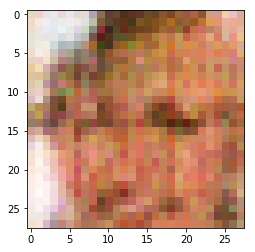

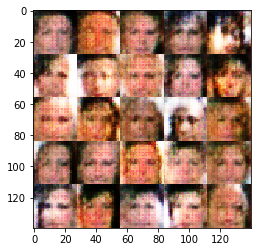

Epoch: 1/1.  Step: 2010.  Discriminator: 1.4525.  Generator: 0.7341.
Epoch: 1/1.  Step: 2020.  Discriminator: 1.4058.  Generator: 0.8238.
Epoch: 1/1.  Step: 2030.  Discriminator: 1.4955.  Generator: 0.7087.
Epoch: 1/1.  Step: 2040.  Discriminator: 1.4267.  Generator: 0.7295.
Epoch: 1/1.  Step: 2050.  Discriminator: 1.4404.  Generator: 0.7641.
Epoch: 1/1.  Step: 2060.  Discriminator: 1.4026.  Generator: 0.7403.
Epoch: 1/1.  Step: 2070.  Discriminator: 1.5018.  Generator: 0.7294.
Epoch: 1/1.  Step: 2080.  Discriminator: 1.4407.  Generator: 0.6990.
Epoch: 1/1.  Step: 2090.  Discriminator: 1.5260.  Generator: 0.7103.
Epoch: 1/1.  Step: 2100.  Discriminator: 1.3947.  Generator: 0.7975.


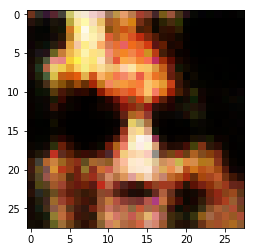

Epoch: 1/1.  Step: 2110.  Discriminator: 1.4644.  Generator: 0.7898.
Epoch: 1/1.  Step: 2120.  Discriminator: 1.4380.  Generator: 0.6882.
Epoch: 1/1.  Step: 2130.  Discriminator: 1.4728.  Generator: 0.7353.
Epoch: 1/1.  Step: 2140.  Discriminator: 1.4069.  Generator: 0.7407.
Epoch: 1/1.  Step: 2150.  Discriminator: 1.4541.  Generator: 0.7843.
Epoch: 1/1.  Step: 2160.  Discriminator: 1.3675.  Generator: 0.8645.
Epoch: 1/1.  Step: 2170.  Discriminator: 1.4532.  Generator: 0.7226.
Epoch: 1/1.  Step: 2180.  Discriminator: 1.4516.  Generator: 0.7029.
Epoch: 1/1.  Step: 2190.  Discriminator: 1.5500.  Generator: 0.5927.
Epoch: 1/1.  Step: 2200.  Discriminator: 1.4497.  Generator: 0.6811.


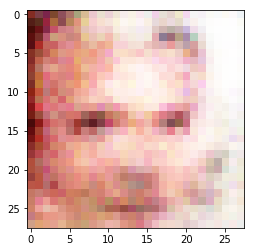

Epoch: 1/1.  Step: 2210.  Discriminator: 1.5052.  Generator: 0.7039.
Epoch: 1/1.  Step: 2220.  Discriminator: 1.4053.  Generator: 0.7588.
Epoch: 1/1.  Step: 2230.  Discriminator: 1.3996.  Generator: 0.7741.
Epoch: 1/1.  Step: 2240.  Discriminator: 1.4581.  Generator: 0.7282.
Epoch: 1/1.  Step: 2250.  Discriminator: 1.4534.  Generator: 0.7040.
Epoch: 1/1.  Step: 2260.  Discriminator: 1.4596.  Generator: 0.7221.
Epoch: 1/1.  Step: 2270.  Discriminator: 1.4463.  Generator: 0.7855.
Epoch: 1/1.  Step: 2280.  Discriminator: 1.4434.  Generator: 0.7405.
Epoch: 1/1.  Step: 2290.  Discriminator: 1.4100.  Generator: 0.8351.
Epoch: 1/1.  Step: 2300.  Discriminator: 1.3949.  Generator: 0.7722.


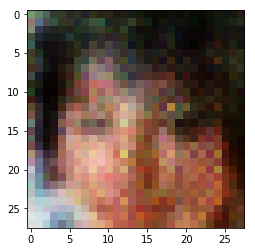

Epoch: 1/1.  Step: 2310.  Discriminator: 1.4858.  Generator: 0.7593.
Epoch: 1/1.  Step: 2320.  Discriminator: 1.4383.  Generator: 0.7255.
Epoch: 1/1.  Step: 2330.  Discriminator: 1.3625.  Generator: 0.7540.
Epoch: 1/1.  Step: 2340.  Discriminator: 1.4929.  Generator: 0.7365.
Epoch: 1/1.  Step: 2350.  Discriminator: 1.4645.  Generator: 0.7737.
Epoch: 1/1.  Step: 2360.  Discriminator: 1.4076.  Generator: 0.7273.
Epoch: 1/1.  Step: 2370.  Discriminator: 1.3990.  Generator: 0.7412.
Epoch: 1/1.  Step: 2380.  Discriminator: 1.4151.  Generator: 0.7831.
Epoch: 1/1.  Step: 2390.  Discriminator: 1.5150.  Generator: 0.6564.
Epoch: 1/1.  Step: 2400.  Discriminator: 1.4636.  Generator: 0.7895.


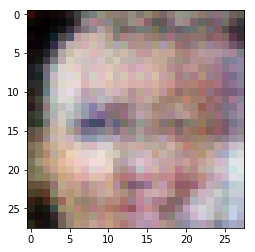

Epoch: 1/1.  Step: 2410.  Discriminator: 1.4209.  Generator: 0.7351.
Epoch: 1/1.  Step: 2420.  Discriminator: 1.4458.  Generator: 0.7159.
Epoch: 1/1.  Step: 2430.  Discriminator: 1.4388.  Generator: 0.7269.
Epoch: 1/1.  Step: 2440.  Discriminator: 1.4520.  Generator: 0.7457.
Epoch: 1/1.  Step: 2450.  Discriminator: 1.4322.  Generator: 0.7684.
Epoch: 1/1.  Step: 2460.  Discriminator: 1.4052.  Generator: 0.7162.
Epoch: 1/1.  Step: 2470.  Discriminator: 1.4520.  Generator: 0.6934.
Epoch: 1/1.  Step: 2480.  Discriminator: 1.4257.  Generator: 0.6685.
Epoch: 1/1.  Step: 2490.  Discriminator: 1.4371.  Generator: 0.7695.
Epoch: 1/1.  Step: 2500.  Discriminator: 1.4144.  Generator: 0.7449.


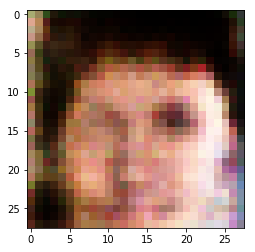

Epoch: 1/1.  Step: 2510.  Discriminator: 1.3975.  Generator: 0.8143.
Epoch: 1/1.  Step: 2520.  Discriminator: 1.4103.  Generator: 0.7987.
Epoch: 1/1.  Step: 2530.  Discriminator: 1.4378.  Generator: 0.7583.
Epoch: 1/1.  Step: 2540.  Discriminator: 1.4656.  Generator: 0.8458.
Epoch: 1/1.  Step: 2550.  Discriminator: 1.3677.  Generator: 0.8242.
Epoch: 1/1.  Step: 2560.  Discriminator: 1.3912.  Generator: 0.8024.
Epoch: 1/1.  Step: 2570.  Discriminator: 1.4068.  Generator: 0.7657.
Epoch: 1/1.  Step: 2580.  Discriminator: 1.4291.  Generator: 0.7535.
Epoch: 1/1.  Step: 2590.  Discriminator: 1.3756.  Generator: 0.8204.
Epoch: 1/1.  Step: 2600.  Discriminator: 1.4797.  Generator: 0.7416.


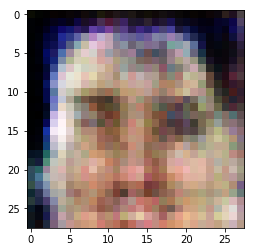

Epoch: 1/1.  Step: 2610.  Discriminator: 1.4502.  Generator: 0.6618.
Epoch: 1/1.  Step: 2620.  Discriminator: 1.5504.  Generator: 0.6877.
Epoch: 1/1.  Step: 2630.  Discriminator: 1.4926.  Generator: 0.7727.
Epoch: 1/1.  Step: 2640.  Discriminator: 1.4876.  Generator: 0.6857.
Epoch: 1/1.  Step: 2650.  Discriminator: 1.5955.  Generator: 0.6419.
Epoch: 1/1.  Step: 2660.  Discriminator: 1.5646.  Generator: 0.6611.
Epoch: 1/1.  Step: 2670.  Discriminator: 1.6117.  Generator: 0.6223.
Epoch: 1/1.  Step: 2680.  Discriminator: 1.4827.  Generator: 0.7672.
Epoch: 1/1.  Step: 2690.  Discriminator: 1.4871.  Generator: 0.6836.
Epoch: 1/1.  Step: 2700.  Discriminator: 1.4173.  Generator: 0.7340.


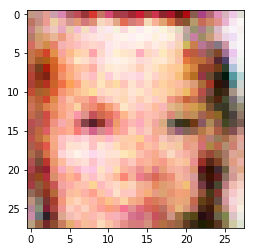

Epoch: 1/1.  Step: 2710.  Discriminator: 1.4511.  Generator: 0.7393.
Epoch: 1/1.  Step: 2720.  Discriminator: 1.4902.  Generator: 0.7019.
Epoch: 1/1.  Step: 2730.  Discriminator: 1.4772.  Generator: 0.6846.
Epoch: 1/1.  Step: 2740.  Discriminator: 1.4118.  Generator: 0.7631.
Epoch: 1/1.  Step: 2750.  Discriminator: 1.4769.  Generator: 0.7635.
Epoch: 1/1.  Step: 2760.  Discriminator: 1.4125.  Generator: 0.7464.
Epoch: 1/1.  Step: 2770.  Discriminator: 1.4760.  Generator: 0.6828.
Epoch: 1/1.  Step: 2780.  Discriminator: 1.4256.  Generator: 0.7712.
Epoch: 1/1.  Step: 2790.  Discriminator: 1.4096.  Generator: 0.7214.
Epoch: 1/1.  Step: 2800.  Discriminator: 1.4456.  Generator: 0.7718.


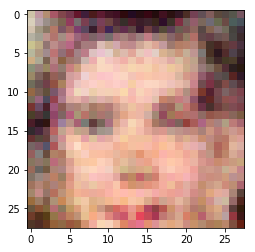

Epoch: 1/1.  Step: 2810.  Discriminator: 1.4887.  Generator: 0.6599.
Epoch: 1/1.  Step: 2820.  Discriminator: 1.5295.  Generator: 0.5843.
Epoch: 1/1.  Step: 2830.  Discriminator: 1.4538.  Generator: 0.7114.
Epoch: 1/1.  Step: 2840.  Discriminator: 1.3965.  Generator: 0.7302.
Epoch: 1/1.  Step: 2850.  Discriminator: 1.4170.  Generator: 0.7483.
Epoch: 1/1.  Step: 2860.  Discriminator: 1.3920.  Generator: 0.7879.
Epoch: 1/1.  Step: 2870.  Discriminator: 1.4344.  Generator: 0.6992.
Epoch: 1/1.  Step: 2880.  Discriminator: 1.4422.  Generator: 0.6698.
Epoch: 1/1.  Step: 2890.  Discriminator: 1.4040.  Generator: 0.7948.
Epoch: 1/1.  Step: 2900.  Discriminator: 1.4360.  Generator: 0.7386.


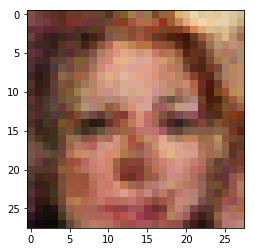

Epoch: 1/1.  Step: 2910.  Discriminator: 1.4270.  Generator: 0.7041.
Epoch: 1/1.  Step: 2920.  Discriminator: 1.4625.  Generator: 0.7527.
Epoch: 1/1.  Step: 2930.  Discriminator: 1.4037.  Generator: 0.7685.
Epoch: 1/1.  Step: 2940.  Discriminator: 1.4547.  Generator: 0.7725.
Epoch: 1/1.  Step: 2950.  Discriminator: 1.3674.  Generator: 0.8826.
Epoch: 1/1.  Step: 2960.  Discriminator: 1.4193.  Generator: 0.8047.
Epoch: 1/1.  Step: 2970.  Discriminator: 1.4166.  Generator: 0.7594.
Epoch: 1/1.  Step: 2980.  Discriminator: 1.4356.  Generator: 0.7969.
Epoch: 1/1.  Step: 2990.  Discriminator: 1.4228.  Generator: 0.7561.
Epoch: 1/1.  Step: 3000.  Discriminator: 1.4584.  Generator: 0.6670.


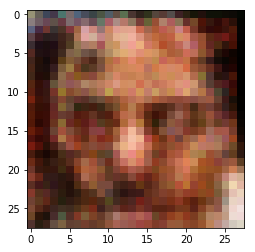

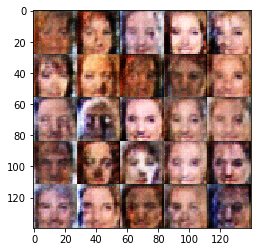

Epoch: 1/1.  Step: 3010.  Discriminator: 1.3757.  Generator: 0.7723.
Epoch: 1/1.  Step: 3020.  Discriminator: 1.4688.  Generator: 0.7633.
Epoch: 1/1.  Step: 3030.  Discriminator: 1.4415.  Generator: 0.7163.
Epoch: 1/1.  Step: 3040.  Discriminator: 1.4061.  Generator: 0.7943.
Epoch: 1/1.  Step: 3050.  Discriminator: 1.3916.  Generator: 0.7562.
Epoch: 1/1.  Step: 3060.  Discriminator: 1.4108.  Generator: 0.7993.
Epoch: 1/1.  Step: 3070.  Discriminator: 1.4565.  Generator: 0.7220.
Epoch: 1/1.  Step: 3080.  Discriminator: 1.4490.  Generator: 0.7548.
Epoch: 1/1.  Step: 3090.  Discriminator: 1.4825.  Generator: 0.6910.
Epoch: 1/1.  Step: 3100.  Discriminator: 1.3749.  Generator: 0.7885.


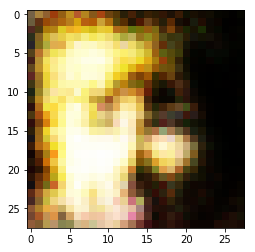

Epoch: 1/1.  Step: 3110.  Discriminator: 1.4624.  Generator: 0.7368.
Epoch: 1/1.  Step: 3120.  Discriminator: 1.3925.  Generator: 0.7930.
Epoch: 1/1.  Step: 3130.  Discriminator: 1.4283.  Generator: 0.7280.
Epoch: 1/1.  Step: 3140.  Discriminator: 1.4442.  Generator: 0.7789.
Epoch: 1/1.  Step: 3150.  Discriminator: 1.4599.  Generator: 0.7566.
Epoch: 1/1.  Step: 3160.  Discriminator: 1.4569.  Generator: 0.7794.
Epoch: 1/1.  Step: 3170.  Discriminator: 1.4441.  Generator: 0.6914.
Epoch: 1/1.  Step: 3180.  Discriminator: 1.4045.  Generator: 0.7879.
Epoch: 1/1.  Step: 3190.  Discriminator: 1.4299.  Generator: 0.7733.
Epoch: 1/1.  Step: 3200.  Discriminator: 1.4909.  Generator: 0.7276.


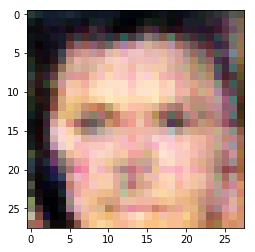

Epoch: 1/1.  Step: 3210.  Discriminator: 1.4149.  Generator: 0.6971.
Epoch: 1/1.  Step: 3220.  Discriminator: 1.4129.  Generator: 0.7365.
Epoch: 1/1.  Step: 3230.  Discriminator: 1.4182.  Generator: 0.7834.
Epoch: 1/1.  Step: 3240.  Discriminator: 1.4753.  Generator: 0.7304.
Epoch: 1/1.  Step: 3250.  Discriminator: 1.4383.  Generator: 0.7257.
Epoch: 1/1.  Step: 3260.  Discriminator: 1.5404.  Generator: 0.7717.
Epoch: 1/1.  Step: 3270.  Discriminator: 1.4201.  Generator: 0.7150.
Epoch: 1/1.  Step: 3280.  Discriminator: 1.4745.  Generator: 0.7664.
Epoch: 1/1.  Step: 3290.  Discriminator: 1.4980.  Generator: 0.7262.
Epoch: 1/1.  Step: 3300.  Discriminator: 1.4072.  Generator: 0.7258.


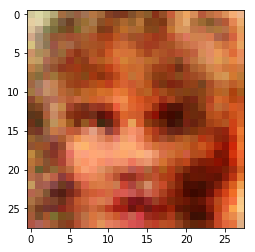

Epoch: 1/1.  Step: 3310.  Discriminator: 1.4348.  Generator: 0.7451.
Epoch: 1/1.  Step: 3320.  Discriminator: 1.4506.  Generator: 0.8389.
Epoch: 1/1.  Step: 3330.  Discriminator: 1.4384.  Generator: 0.7007.
Epoch: 1/1.  Step: 3340.  Discriminator: 1.3918.  Generator: 0.7894.
Epoch: 1/1.  Step: 3350.  Discriminator: 1.4421.  Generator: 0.6524.
Epoch: 1/1.  Step: 3360.  Discriminator: 1.4339.  Generator: 0.7098.
Epoch: 1/1.  Step: 3370.  Discriminator: 1.4263.  Generator: 0.6697.
Epoch: 1/1.  Step: 3380.  Discriminator: 1.3767.  Generator: 0.8327.
Epoch: 1/1.  Step: 3390.  Discriminator: 1.4713.  Generator: 0.6648.
Epoch: 1/1.  Step: 3400.  Discriminator: 1.4797.  Generator: 0.6803.


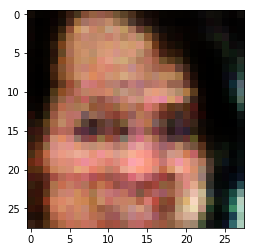

Epoch: 1/1.  Step: 3410.  Discriminator: 1.3825.  Generator: 0.8156.
Epoch: 1/1.  Step: 3420.  Discriminator: 1.4364.  Generator: 0.7376.
Epoch: 1/1.  Step: 3430.  Discriminator: 1.3982.  Generator: 0.7922.
Epoch: 1/1.  Step: 3440.  Discriminator: 1.4144.  Generator: 0.7229.
Epoch: 1/1.  Step: 3450.  Discriminator: 1.4270.  Generator: 0.7239.
Epoch: 1/1.  Step: 3460.  Discriminator: 1.4537.  Generator: 0.8683.
Epoch: 1/1.  Step: 3470.  Discriminator: 1.3858.  Generator: 0.7590.
Epoch: 1/1.  Step: 3480.  Discriminator: 1.4168.  Generator: 0.7809.
Epoch: 1/1.  Step: 3490.  Discriminator: 1.4191.  Generator: 0.7810.
Epoch: 1/1.  Step: 3500.  Discriminator: 1.4091.  Generator: 0.8758.


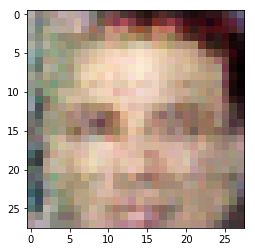

Epoch: 1/1.  Step: 3510.  Discriminator: 1.4326.  Generator: 0.7363.
Epoch: 1/1.  Step: 3520.  Discriminator: 1.4019.  Generator: 0.7637.
Epoch: 1/1.  Step: 3530.  Discriminator: 1.4159.  Generator: 0.7677.
Epoch: 1/1.  Step: 3540.  Discriminator: 1.4003.  Generator: 0.8221.
Epoch: 1/1.  Step: 3550.  Discriminator: 1.3954.  Generator: 0.7547.
Epoch: 1/1.  Step: 3560.  Discriminator: 1.4046.  Generator: 0.7665.
Epoch: 1/1.  Step: 3570.  Discriminator: 1.4496.  Generator: 0.8065.
Epoch: 1/1.  Step: 3580.  Discriminator: 1.4665.  Generator: 0.7507.
Epoch: 1/1.  Step: 3590.  Discriminator: 1.4874.  Generator: 0.6789.
Epoch: 1/1.  Step: 3600.  Discriminator: 1.4353.  Generator: 0.7738.


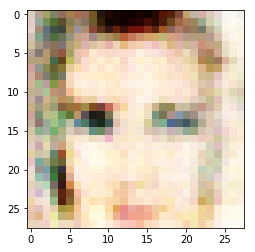

Epoch: 1/1.  Step: 3610.  Discriminator: 1.4310.  Generator: 0.7512.
Epoch: 1/1.  Step: 3620.  Discriminator: 1.4325.  Generator: 0.8894.
Epoch: 1/1.  Step: 3630.  Discriminator: 1.4608.  Generator: 0.7486.
Epoch: 1/1.  Step: 3640.  Discriminator: 1.4220.  Generator: 0.7455.
Epoch: 1/1.  Step: 3650.  Discriminator: 1.3943.  Generator: 0.7848.
Epoch: 1/1.  Step: 3660.  Discriminator: 1.3899.  Generator: 0.7614.
Epoch: 1/1.  Step: 3670.  Discriminator: 1.4121.  Generator: 0.7110.
Epoch: 1/1.  Step: 3680.  Discriminator: 1.4136.  Generator: 0.7067.
Epoch: 1/1.  Step: 3690.  Discriminator: 1.4672.  Generator: 0.7268.
Epoch: 1/1.  Step: 3700.  Discriminator: 1.3647.  Generator: 0.8826.


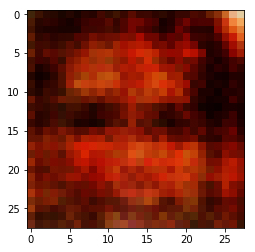

Epoch: 1/1.  Step: 3710.  Discriminator: 1.4657.  Generator: 0.7483.
Epoch: 1/1.  Step: 3720.  Discriminator: 1.4334.  Generator: 0.7019.
Epoch: 1/1.  Step: 3730.  Discriminator: 1.4234.  Generator: 0.7865.
Epoch: 1/1.  Step: 3740.  Discriminator: 1.4137.  Generator: 0.7700.
Epoch: 1/1.  Step: 3750.  Discriminator: 1.4442.  Generator: 0.8159.
Epoch: 1/1.  Step: 3760.  Discriminator: 1.3961.  Generator: 0.7556.
Epoch: 1/1.  Step: 3770.  Discriminator: 1.4106.  Generator: 0.7994.
Epoch: 1/1.  Step: 3780.  Discriminator: 1.4228.  Generator: 0.6794.
Epoch: 1/1.  Step: 3790.  Discriminator: 1.3892.  Generator: 0.7660.
Epoch: 1/1.  Step: 3800.  Discriminator: 1.4293.  Generator: 0.8414.


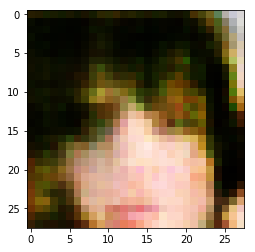

Epoch: 1/1.  Step: 3810.  Discriminator: 1.5443.  Generator: 0.6886.
Epoch: 1/1.  Step: 3820.  Discriminator: 1.5163.  Generator: 0.7036.
Epoch: 1/1.  Step: 3830.  Discriminator: 1.4271.  Generator: 0.7444.
Epoch: 1/1.  Step: 3840.  Discriminator: 1.4261.  Generator: 0.6770.
Epoch: 1/1.  Step: 3850.  Discriminator: 1.4591.  Generator: 0.8054.
Epoch: 1/1.  Step: 3860.  Discriminator: 1.3854.  Generator: 0.7861.
Epoch: 1/1.  Step: 3870.  Discriminator: 1.4253.  Generator: 0.7345.
Epoch: 1/1.  Step: 3880.  Discriminator: 1.5536.  Generator: 0.6585.
Epoch: 1/1.  Step: 3890.  Discriminator: 1.4712.  Generator: 0.7074.
Epoch: 1/1.  Step: 3900.  Discriminator: 1.4359.  Generator: 0.7412.


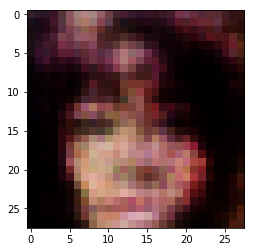

Epoch: 1/1.  Step: 3910.  Discriminator: 1.4172.  Generator: 0.7527.
Epoch: 1/1.  Step: 3920.  Discriminator: 1.4287.  Generator: 0.7109.
Epoch: 1/1.  Step: 3930.  Discriminator: 1.4088.  Generator: 0.7884.
Epoch: 1/1.  Step: 3940.  Discriminator: 1.4336.  Generator: 0.8277.
Epoch: 1/1.  Step: 3950.  Discriminator: 1.4637.  Generator: 0.7642.
Epoch: 1/1.  Step: 3960.  Discriminator: 1.4949.  Generator: 0.6717.
Epoch: 1/1.  Step: 3970.  Discriminator: 1.4489.  Generator: 0.7437.
Epoch: 1/1.  Step: 3980.  Discriminator: 1.4050.  Generator: 0.7690.
Epoch: 1/1.  Step: 3990.  Discriminator: 1.4411.  Generator: 0.7963.
Epoch: 1/1.  Step: 4000.  Discriminator: 1.4602.  Generator: 0.7428.


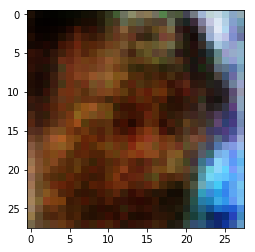

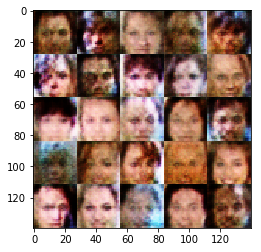

Epoch: 1/1.  Step: 4010.  Discriminator: 1.4110.  Generator: 0.7733.
Epoch: 1/1.  Step: 4020.  Discriminator: 1.4130.  Generator: 0.7652.
Epoch: 1/1.  Step: 4030.  Discriminator: 1.4136.  Generator: 0.8315.
Epoch: 1/1.  Step: 4040.  Discriminator: 1.3977.  Generator: 0.7434.
Epoch: 1/1.  Step: 4050.  Discriminator: 1.4451.  Generator: 0.7706.
Epoch: 1/1.  Step: 4060.  Discriminator: 1.4542.  Generator: 0.7657.
Epoch: 1/1.  Step: 4070.  Discriminator: 1.4851.  Generator: 0.6984.
Epoch: 1/1.  Step: 4080.  Discriminator: 1.4195.  Generator: 0.7938.
Epoch: 1/1.  Step: 4090.  Discriminator: 1.4208.  Generator: 0.7883.
Epoch: 1/1.  Step: 4100.  Discriminator: 1.3825.  Generator: 0.8113.


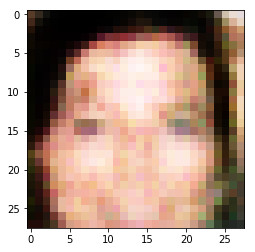

Epoch: 1/1.  Step: 4110.  Discriminator: 1.4357.  Generator: 0.8151.
Epoch: 1/1.  Step: 4120.  Discriminator: 1.4380.  Generator: 0.7283.
Epoch: 1/1.  Step: 4130.  Discriminator: 1.3891.  Generator: 0.8196.
Epoch: 1/1.  Step: 4140.  Discriminator: 1.4282.  Generator: 0.7545.
Epoch: 1/1.  Step: 4150.  Discriminator: 1.3895.  Generator: 0.7694.
Epoch: 1/1.  Step: 4160.  Discriminator: 1.4479.  Generator: 0.7511.
Epoch: 1/1.  Step: 4170.  Discriminator: 1.4443.  Generator: 0.7208.
Epoch: 1/1.  Step: 4180.  Discriminator: 1.4582.  Generator: 0.7566.
Epoch: 1/1.  Step: 4190.  Discriminator: 1.4104.  Generator: 0.7109.
Epoch: 1/1.  Step: 4200.  Discriminator: 1.4747.  Generator: 0.7660.


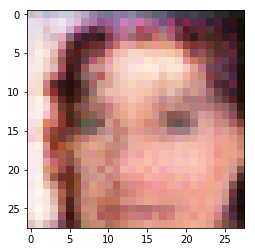

Epoch: 1/1.  Step: 4210.  Discriminator: 1.4148.  Generator: 0.7463.
Epoch: 1/1.  Step: 4220.  Discriminator: 1.4293.  Generator: 0.8123.
Epoch: 1/1.  Step: 4230.  Discriminator: 1.4455.  Generator: 0.8595.
Epoch: 1/1.  Step: 4240.  Discriminator: 1.4380.  Generator: 0.7417.
Epoch: 1/1.  Step: 4250.  Discriminator: 1.4119.  Generator: 0.7199.
Epoch: 1/1.  Step: 4260.  Discriminator: 1.4362.  Generator: 0.6708.
Epoch: 1/1.  Step: 4270.  Discriminator: 1.4333.  Generator: 0.8183.
Epoch: 1/1.  Step: 4280.  Discriminator: 1.4165.  Generator: 0.7440.
Epoch: 1/1.  Step: 4290.  Discriminator: 1.4127.  Generator: 0.6925.
Epoch: 1/1.  Step: 4300.  Discriminator: 1.4563.  Generator: 0.6795.


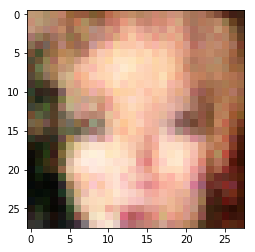

Epoch: 1/1.  Step: 4310.  Discriminator: 1.3746.  Generator: 0.7884.
Epoch: 1/1.  Step: 4320.  Discriminator: 1.4066.  Generator: 0.7403.
Epoch: 1/1.  Step: 4330.  Discriminator: 1.4463.  Generator: 0.6409.
Epoch: 1/1.  Step: 4340.  Discriminator: 1.4779.  Generator: 0.7529.
Epoch: 1/1.  Step: 4350.  Discriminator: 1.4336.  Generator: 0.7060.
Epoch: 1/1.  Step: 4360.  Discriminator: 1.4383.  Generator: 0.7122.
Epoch: 1/1.  Step: 4370.  Discriminator: 1.3840.  Generator: 0.7537.
Epoch: 1/1.  Step: 4380.  Discriminator: 1.4236.  Generator: 0.6837.
Epoch: 1/1.  Step: 4390.  Discriminator: 1.4191.  Generator: 0.7781.
Epoch: 1/1.  Step: 4400.  Discriminator: 1.4124.  Generator: 0.8333.


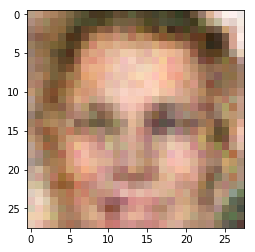

Epoch: 1/1.  Step: 4410.  Discriminator: 1.3801.  Generator: 0.8127.
Epoch: 1/1.  Step: 4420.  Discriminator: 1.4006.  Generator: 0.8238.
Epoch: 1/1.  Step: 4430.  Discriminator: 1.4387.  Generator: 0.7730.
Epoch: 1/1.  Step: 4440.  Discriminator: 1.5210.  Generator: 0.6623.
Epoch: 1/1.  Step: 4450.  Discriminator: 1.4312.  Generator: 0.7084.
Epoch: 1/1.  Step: 4460.  Discriminator: 1.3910.  Generator: 0.8352.
Epoch: 1/1.  Step: 4470.  Discriminator: 1.3958.  Generator: 0.7612.
Epoch: 1/1.  Step: 4480.  Discriminator: 1.4061.  Generator: 0.7918.
Epoch: 1/1.  Step: 4490.  Discriminator: 1.4326.  Generator: 0.7665.
Epoch: 1/1.  Step: 4500.  Discriminator: 1.4262.  Generator: 0.6783.


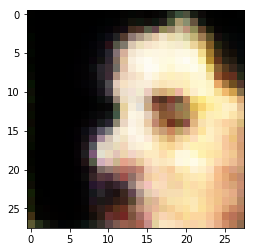

Epoch: 1/1.  Step: 4510.  Discriminator: 1.4035.  Generator: 0.7841.
Epoch: 1/1.  Step: 4520.  Discriminator: 1.4364.  Generator: 0.7496.
Epoch: 1/1.  Step: 4530.  Discriminator: 1.4267.  Generator: 0.7840.
Epoch: 1/1.  Step: 4540.  Discriminator: 1.4100.  Generator: 0.7529.
Epoch: 1/1.  Step: 4550.  Discriminator: 1.4493.  Generator: 0.6788.
Epoch: 1/1.  Step: 4560.  Discriminator: 1.3801.  Generator: 0.7695.
Epoch: 1/1.  Step: 4570.  Discriminator: 1.3639.  Generator: 0.8354.
Epoch: 1/1.  Step: 4580.  Discriminator: 1.3994.  Generator: 0.8625.
Epoch: 1/1.  Step: 4590.  Discriminator: 1.4244.  Generator: 0.7679.
Epoch: 1/1.  Step: 4600.  Discriminator: 1.3867.  Generator: 0.7844.


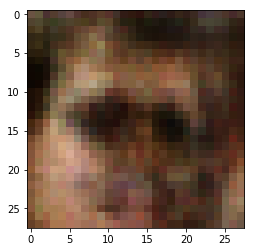

Epoch: 1/1.  Step: 4610.  Discriminator: 1.4268.  Generator: 0.7432.
Epoch: 1/1.  Step: 4620.  Discriminator: 1.4079.  Generator: 0.7651.
Epoch: 1/1.  Step: 4630.  Discriminator: 1.3925.  Generator: 0.7712.
Epoch: 1/1.  Step: 4640.  Discriminator: 1.4675.  Generator: 0.7457.
Epoch: 1/1.  Step: 4650.  Discriminator: 1.4510.  Generator: 0.7208.
Epoch: 1/1.  Step: 4660.  Discriminator: 1.4412.  Generator: 0.8444.
Epoch: 1/1.  Step: 4670.  Discriminator: 1.4074.  Generator: 0.7340.
Epoch: 1/1.  Step: 4680.  Discriminator: 1.4368.  Generator: 0.8037.
Epoch: 1/1.  Step: 4690.  Discriminator: 1.4146.  Generator: 0.7811.
Epoch: 1/1.  Step: 4700.  Discriminator: 1.4131.  Generator: 0.8300.


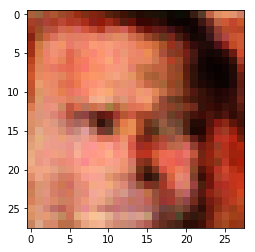

Epoch: 1/1.  Step: 4710.  Discriminator: 1.4263.  Generator: 0.7185.
Epoch: 1/1.  Step: 4720.  Discriminator: 1.4793.  Generator: 0.7305.
Epoch: 1/1.  Step: 4730.  Discriminator: 1.5072.  Generator: 0.6935.
Epoch: 1/1.  Step: 4740.  Discriminator: 1.4677.  Generator: 0.6093.
Epoch: 1/1.  Step: 4750.  Discriminator: 1.4356.  Generator: 0.7867.
Epoch: 1/1.  Step: 4760.  Discriminator: 1.4656.  Generator: 0.6477.
Epoch: 1/1.  Step: 4770.  Discriminator: 1.4056.  Generator: 0.8683.
Epoch: 1/1.  Step: 4780.  Discriminator: 1.4430.  Generator: 0.8851.
Epoch: 1/1.  Step: 4790.  Discriminator: 1.3859.  Generator: 0.7829.
Epoch: 1/1.  Step: 4800.  Discriminator: 1.4084.  Generator: 0.7332.


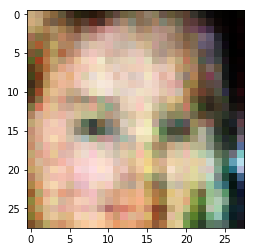

Epoch: 1/1.  Step: 4810.  Discriminator: 1.4165.  Generator: 0.7588.
Epoch: 1/1.  Step: 4820.  Discriminator: 1.4197.  Generator: 0.7954.
Epoch: 1/1.  Step: 4830.  Discriminator: 1.3986.  Generator: 0.7802.
Epoch: 1/1.  Step: 4840.  Discriminator: 1.3892.  Generator: 0.7458.
Epoch: 1/1.  Step: 4850.  Discriminator: 1.4257.  Generator: 0.8528.
Epoch: 1/1.  Step: 4860.  Discriminator: 1.4083.  Generator: 0.7731.
Epoch: 1/1.  Step: 4870.  Discriminator: 1.4102.  Generator: 0.8591.
Epoch: 1/1.  Step: 4880.  Discriminator: 1.3854.  Generator: 0.8467.
Epoch: 1/1.  Step: 4890.  Discriminator: 1.4044.  Generator: 0.7240.
Epoch: 1/1.  Step: 4900.  Discriminator: 1.4033.  Generator: 0.7754.


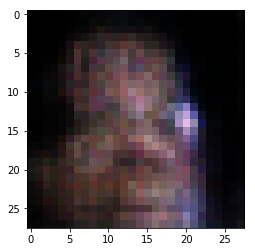

Epoch: 1/1.  Step: 4910.  Discriminator: 1.3950.  Generator: 0.8080.
Epoch: 1/1.  Step: 4920.  Discriminator: 1.4159.  Generator: 0.8729.
Epoch: 1/1.  Step: 4930.  Discriminator: 1.4079.  Generator: 0.8096.
Epoch: 1/1.  Step: 4940.  Discriminator: 1.4037.  Generator: 0.7097.
Epoch: 1/1.  Step: 4950.  Discriminator: 1.4101.  Generator: 0.6925.
Epoch: 1/1.  Step: 4960.  Discriminator: 1.3995.  Generator: 0.8166.
Epoch: 1/1.  Step: 4970.  Discriminator: 1.4214.  Generator: 0.7758.
Epoch: 1/1.  Step: 4980.  Discriminator: 1.4048.  Generator: 0.7470.
Epoch: 1/1.  Step: 4990.  Discriminator: 1.5029.  Generator: 0.6515.
Epoch: 1/1.  Step: 5000.  Discriminator: 1.4243.  Generator: 0.8190.


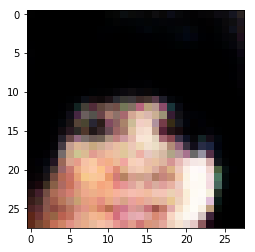

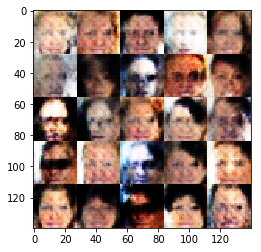

Epoch: 1/1.  Step: 5010.  Discriminator: 1.4147.  Generator: 0.7547.
Epoch: 1/1.  Step: 5020.  Discriminator: 1.4448.  Generator: 0.7113.
Epoch: 1/1.  Step: 5030.  Discriminator: 1.4528.  Generator: 0.6908.
Epoch: 1/1.  Step: 5040.  Discriminator: 1.5925.  Generator: 0.6177.
Epoch: 1/1.  Step: 5050.  Discriminator: 1.5054.  Generator: 0.6647.
Epoch: 1/1.  Step: 5060.  Discriminator: 1.3947.  Generator: 0.8675.
Epoch: 1/1.  Step: 5070.  Discriminator: 1.4020.  Generator: 0.8500.
Epoch: 1/1.  Step: 5080.  Discriminator: 1.4162.  Generator: 0.7874.
Epoch: 1/1.  Step: 5090.  Discriminator: 1.3882.  Generator: 0.7287.
Epoch: 1/1.  Step: 5100.  Discriminator: 1.4128.  Generator: 0.7460.


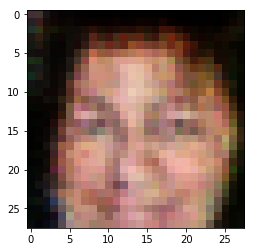

Epoch: 1/1.  Step: 5110.  Discriminator: 1.4107.  Generator: 0.7681.
Epoch: 1/1.  Step: 5120.  Discriminator: 1.4281.  Generator: 0.7042.
Epoch: 1/1.  Step: 5130.  Discriminator: 1.4227.  Generator: 0.7482.
Epoch: 1/1.  Step: 5140.  Discriminator: 1.4396.  Generator: 0.7436.
Epoch: 1/1.  Step: 5150.  Discriminator: 1.4489.  Generator: 0.7800.
Epoch: 1/1.  Step: 5160.  Discriminator: 1.4030.  Generator: 0.7516.
Epoch: 1/1.  Step: 5170.  Discriminator: 1.4083.  Generator: 0.7185.
Epoch: 1/1.  Step: 5180.  Discriminator: 1.4003.  Generator: 0.8202.
Epoch: 1/1.  Step: 5190.  Discriminator: 1.3922.  Generator: 0.7404.
Epoch: 1/1.  Step: 5200.  Discriminator: 1.4065.  Generator: 0.7501.


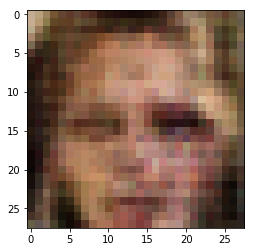

Epoch: 1/1.  Step: 5210.  Discriminator: 1.3975.  Generator: 0.7876.
Epoch: 1/1.  Step: 5220.  Discriminator: 1.4313.  Generator: 0.7284.
Epoch: 1/1.  Step: 5230.  Discriminator: 1.4123.  Generator: 0.8067.
Epoch: 1/1.  Step: 5240.  Discriminator: 1.3919.  Generator: 0.8236.
Epoch: 1/1.  Step: 5250.  Discriminator: 1.3821.  Generator: 0.8315.
Epoch: 1/1.  Step: 5260.  Discriminator: 1.4295.  Generator: 0.7534.
Epoch: 1/1.  Step: 5270.  Discriminator: 1.4067.  Generator: 0.8208.
Epoch: 1/1.  Step: 5280.  Discriminator: 1.4198.  Generator: 0.7019.
Epoch: 1/1.  Step: 5290.  Discriminator: 1.4103.  Generator: 0.7581.
Epoch: 1/1.  Step: 5300.  Discriminator: 1.3928.  Generator: 0.7882.


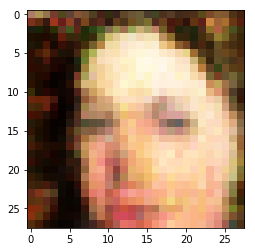

Epoch: 1/1.  Step: 5310.  Discriminator: 1.4251.  Generator: 0.7068.
Epoch: 1/1.  Step: 5320.  Discriminator: 1.4118.  Generator: 0.8063.
Epoch: 1/1.  Step: 5330.  Discriminator: 1.4072.  Generator: 0.7551.
Epoch: 1/1.  Step: 5340.  Discriminator: 1.4417.  Generator: 0.7778.
Epoch: 1/1.  Step: 5350.  Discriminator: 1.4348.  Generator: 0.7849.
Epoch: 1/1.  Step: 5360.  Discriminator: 1.4397.  Generator: 0.7301.
Epoch: 1/1.  Step: 5370.  Discriminator: 1.3748.  Generator: 0.8602.
Epoch: 1/1.  Step: 5380.  Discriminator: 1.4310.  Generator: 0.7772.
Epoch: 1/1.  Step: 5390.  Discriminator: 1.3904.  Generator: 0.6973.
Epoch: 1/1.  Step: 5400.  Discriminator: 1.3947.  Generator: 0.7773.


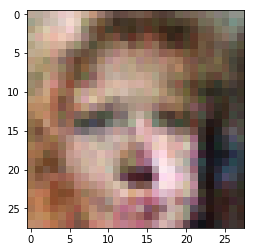

Epoch: 1/1.  Step: 5410.  Discriminator: 1.4119.  Generator: 0.7787.
Epoch: 1/1.  Step: 5420.  Discriminator: 1.4147.  Generator: 0.7218.
Epoch: 1/1.  Step: 5430.  Discriminator: 1.4185.  Generator: 0.7735.
Epoch: 1/1.  Step: 5440.  Discriminator: 1.3973.  Generator: 0.8260.
Epoch: 1/1.  Step: 5450.  Discriminator: 1.4370.  Generator: 0.6618.
Epoch: 1/1.  Step: 5460.  Discriminator: 1.3695.  Generator: 0.7979.
Epoch: 1/1.  Step: 5470.  Discriminator: 1.4133.  Generator: 0.8875.
Epoch: 1/1.  Step: 5480.  Discriminator: 1.4239.  Generator: 0.7902.
Epoch: 1/1.  Step: 5490.  Discriminator: 1.4038.  Generator: 0.7947.
Epoch: 1/1.  Step: 5500.  Discriminator: 1.4268.  Generator: 0.7228.


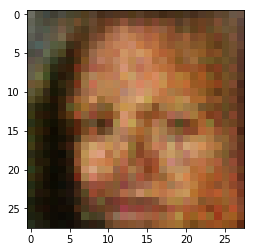

Epoch: 1/1.  Step: 5510.  Discriminator: 1.3969.  Generator: 0.7873.
Epoch: 1/1.  Step: 5520.  Discriminator: 1.3812.  Generator: 0.7662.
Epoch: 1/1.  Step: 5530.  Discriminator: 1.4372.  Generator: 0.6879.
Epoch: 1/1.  Step: 5540.  Discriminator: 1.4228.  Generator: 0.7553.
Epoch: 1/1.  Step: 5550.  Discriminator: 1.4271.  Generator: 0.6882.
Epoch: 1/1.  Step: 5560.  Discriminator: 1.3896.  Generator: 0.8155.
Epoch: 1/1.  Step: 5570.  Discriminator: 1.3810.  Generator: 0.8128.
Epoch: 1/1.  Step: 5580.  Discriminator: 1.4302.  Generator: 0.6867.
Epoch: 1/1.  Step: 5590.  Discriminator: 1.4399.  Generator: 0.7912.
Epoch: 1/1.  Step: 5600.  Discriminator: 1.4077.  Generator: 0.7615.


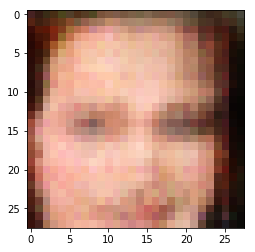

Epoch: 1/1.  Step: 5610.  Discriminator: 1.4316.  Generator: 0.7695.
Epoch: 1/1.  Step: 5620.  Discriminator: 1.4179.  Generator: 0.7650.
Epoch: 1/1.  Step: 5630.  Discriminator: 1.3962.  Generator: 0.7602.
Epoch: 1/1.  Step: 5640.  Discriminator: 1.4587.  Generator: 0.7537.
Epoch: 1/1.  Step: 5650.  Discriminator: 1.3897.  Generator: 0.7906.
Epoch: 1/1.  Step: 5660.  Discriminator: 1.4326.  Generator: 0.7211.
Epoch: 1/1.  Step: 5670.  Discriminator: 1.4162.  Generator: 0.7960.
Epoch: 1/1.  Step: 5680.  Discriminator: 1.4257.  Generator: 0.7328.
Epoch: 1/1.  Step: 5690.  Discriminator: 1.3983.  Generator: 0.8205.
Epoch: 1/1.  Step: 5700.  Discriminator: 1.3935.  Generator: 0.7745.


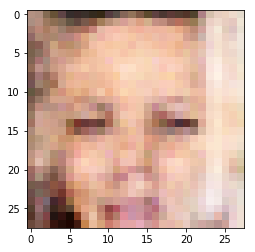

Epoch: 1/1.  Step: 5710.  Discriminator: 1.4129.  Generator: 0.7899.
Epoch: 1/1.  Step: 5720.  Discriminator: 1.3840.  Generator: 0.8229.
Epoch: 1/1.  Step: 5730.  Discriminator: 1.4297.  Generator: 0.6723.
Epoch: 1/1.  Step: 5740.  Discriminator: 1.4000.  Generator: 0.7656.
Epoch: 1/1.  Step: 5750.  Discriminator: 1.3932.  Generator: 0.7309.
Epoch: 1/1.  Step: 5760.  Discriminator: 1.3808.  Generator: 0.7471.
Epoch: 1/1.  Step: 5770.  Discriminator: 1.4175.  Generator: 0.7233.
Epoch: 1/1.  Step: 5780.  Discriminator: 1.3999.  Generator: 0.8062.
Epoch: 1/1.  Step: 5790.  Discriminator: 1.4069.  Generator: 0.8962.
Epoch: 1/1.  Step: 5800.  Discriminator: 1.4475.  Generator: 0.7230.


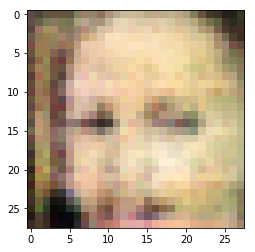

Epoch: 1/1.  Step: 5810.  Discriminator: 1.4240.  Generator: 0.7998.
Epoch: 1/1.  Step: 5820.  Discriminator: 1.3678.  Generator: 0.8334.
Epoch: 1/1.  Step: 5830.  Discriminator: 1.4183.  Generator: 0.7274.
Epoch: 1/1.  Step: 5840.  Discriminator: 1.4072.  Generator: 0.8139.
Epoch: 1/1.  Step: 5850.  Discriminator: 1.4006.  Generator: 0.8119.
Epoch: 1/1.  Step: 5860.  Discriminator: 1.3978.  Generator: 0.8006.
Epoch: 1/1.  Step: 5870.  Discriminator: 1.4369.  Generator: 0.7901.
Epoch: 1/1.  Step: 5880.  Discriminator: 1.4737.  Generator: 0.6918.
Epoch: 1/1.  Step: 5890.  Discriminator: 1.4109.  Generator: 0.7156.
Epoch: 1/1.  Step: 5900.  Discriminator: 1.4230.  Generator: 0.7598.


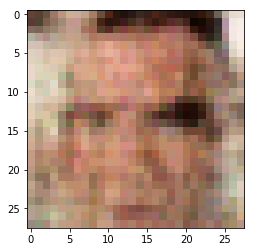

Epoch: 1/1.  Step: 5910.  Discriminator: 1.3905.  Generator: 0.7360.
Epoch: 1/1.  Step: 5920.  Discriminator: 1.4280.  Generator: 0.7577.
Epoch: 1/1.  Step: 5930.  Discriminator: 1.4612.  Generator: 0.6577.
Epoch: 1/1.  Step: 5940.  Discriminator: 1.4183.  Generator: 0.7990.
Epoch: 1/1.  Step: 5950.  Discriminator: 1.4229.  Generator: 0.7414.
Epoch: 1/1.  Step: 5960.  Discriminator: 1.3772.  Generator: 0.8554.
Epoch: 1/1.  Step: 5970.  Discriminator: 1.4302.  Generator: 0.7302.
Epoch: 1/1.  Step: 5980.  Discriminator: 1.4041.  Generator: 0.7675.
Epoch: 1/1.  Step: 5990.  Discriminator: 1.3979.  Generator: 0.7426.
Epoch: 1/1.  Step: 6000.  Discriminator: 1.3987.  Generator: 0.7152.


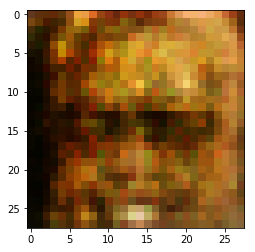

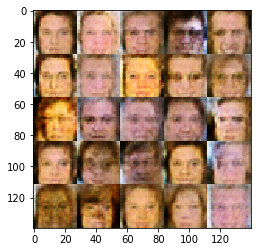

Epoch: 1/1.  Step: 6010.  Discriminator: 1.4078.  Generator: 0.7668.
Epoch: 1/1.  Step: 6020.  Discriminator: 1.4429.  Generator: 0.7329.
Epoch: 1/1.  Step: 6030.  Discriminator: 1.4176.  Generator: 0.7666.
Epoch: 1/1.  Step: 6040.  Discriminator: 1.4004.  Generator: 0.7613.
Epoch: 1/1.  Step: 6050.  Discriminator: 1.3845.  Generator: 0.7709.
Epoch: 1/1.  Step: 6060.  Discriminator: 1.4109.  Generator: 0.7948.
Epoch: 1/1.  Step: 6070.  Discriminator: 1.3902.  Generator: 0.7527.
Epoch: 1/1.  Step: 6080.  Discriminator: 1.3956.  Generator: 0.7269.
Epoch: 1/1.  Step: 6090.  Discriminator: 1.3915.  Generator: 0.8211.
Epoch: 1/1.  Step: 6100.  Discriminator: 1.4428.  Generator: 0.6677.


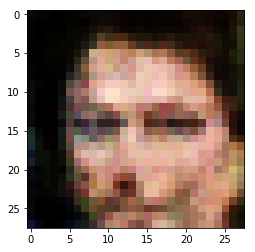

Epoch: 1/1.  Step: 6110.  Discriminator: 1.4200.  Generator: 0.6680.
Epoch: 1/1.  Step: 6120.  Discriminator: 1.4229.  Generator: 0.7220.
Epoch: 1/1.  Step: 6130.  Discriminator: 1.4249.  Generator: 0.8606.
Epoch: 1/1.  Step: 6140.  Discriminator: 1.3915.  Generator: 0.7715.
Epoch: 1/1.  Step: 6150.  Discriminator: 1.3981.  Generator: 0.7335.
Epoch: 1/1.  Step: 6160.  Discriminator: 1.3954.  Generator: 0.8174.
Epoch: 1/1.  Step: 6170.  Discriminator: 1.4496.  Generator: 0.7800.
Epoch: 1/1.  Step: 6180.  Discriminator: 1.4723.  Generator: 0.7620.
Epoch: 1/1.  Step: 6190.  Discriminator: 1.3920.  Generator: 0.7783.
Epoch: 1/1.  Step: 6200.  Discriminator: 1.4304.  Generator: 0.7400.


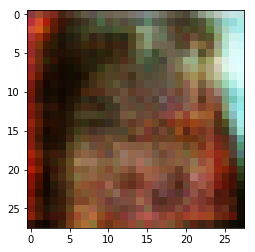

Epoch: 1/1.  Step: 6210.  Discriminator: 1.4378.  Generator: 0.7020.
Epoch: 1/1.  Step: 6220.  Discriminator: 1.4035.  Generator: 0.8064.
Epoch: 1/1.  Step: 6230.  Discriminator: 1.4090.  Generator: 0.7034.
Epoch: 1/1.  Step: 6240.  Discriminator: 1.3774.  Generator: 0.8800.
Epoch: 1/1.  Step: 6250.  Discriminator: 1.4018.  Generator: 0.7256.
Epoch: 1/1.  Step: 6260.  Discriminator: 1.4073.  Generator: 0.6938.
Epoch: 1/1.  Step: 6270.  Discriminator: 1.3979.  Generator: 0.8224.
Epoch: 1/1.  Step: 6280.  Discriminator: 1.3995.  Generator: 0.7561.
Epoch: 1/1.  Step: 6290.  Discriminator: 1.3944.  Generator: 0.7781.
Epoch: 1/1.  Step: 6300.  Discriminator: 1.4364.  Generator: 0.7879.


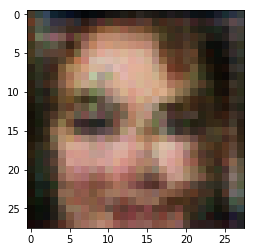

Epoch: 1/1.  Step: 6310.  Discriminator: 1.3980.  Generator: 0.7732.
Epoch: 1/1.  Step: 6320.  Discriminator: 1.4070.  Generator: 0.8569.
Epoch: 1/1.  Step: 6330.  Discriminator: 1.4082.  Generator: 0.7436.


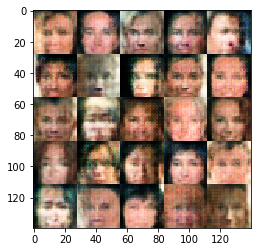

In [18]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.